In [1]:
import xscen as xs
import xarray as xr
import cartopy.crs as ccrs
from xscen.config import CONFIG
import figanos.matplotlib as fg
import matplotlib.pyplot as plt
fg.utils.set_mpl_style('ouranos')

# Load configuration
xs.load_config(
    "../paths_obs.yml", "../config_obs.yml", verbose=(__name__ == "__main__"), reset=True
)

In [2]:
pcat = xs.ProjectCatalog(CONFIG["paths"]["project_catalog"])
pcat.df

id            type processing_level  \
0    ECMWF_ERA5-Land_NAM_reconstruction  reconstruction        extracted   
1        GovCan_RDRS_NAM_reconstruction  reconstruction        extracted   
2        GovCan_CaSR_NAM_reconstruction  reconstruction        extracted   
3     USask_EMDNA_OI_NAM_reconstruction  reconstruction        extracted   
4     PCIC_PCICBlend_CAN_reconstruction  reconstruction        extracted   
..                                  ...             ...              ...   
150                            multiple  reconstruction    regional_mean   
151                            multiple  reconstruction        coherence   
152                            multiple  reconstruction        coherence   
153                            multiple  reconstruction        coherence   
154                            multiple  reconstruction        coherence   

    bias_adjust_institution bias_adjust_project mip_era activity  \
0                       NaN                 NaN     NaN      NaN   
1                       NaN                 NaN     NaN      NaN   
2                       NaN                 NaN     NaN      NaN   
3                       NaN                 NaN     NaN      NaN   
4                       NaN                 NaN     NaN      NaN   
..                      ...                 ...     ...      ...   
150                     NaN                 NaN     NaN      NaN   
151                     NaN                 NaN     NaN      NaN   
152                     NaN                 NaN     NaN      NaN   
153                     NaN                 NaN     NaN      NaN   
154                     NaN                 NaN     NaN      NaN   

    driving_model driving_member institution  ... xrfreq frequency  \
0             NaN            NaN       ECMWF  ...      D       day   
1             NaN            NaN      GovCan  ...      D       day   
2             NaN            NaN      GovCan  ...      D       day   
3             NaN            NaN       USask  ...      D       day   
4             NaN            NaN        PCIC  ...      D       day   
..            ...            ...         ...  ...    ...       ...   
150           NaN            NaN        PCIC  ...     fx       qtr   
151           NaN            NaN        PCIC  ...     fx        yr   
152           NaN            NaN        PCIC  ...     fx        yr   
153           NaN            NaN        PCIC  ...     fx       qtr   
154           NaN            NaN       ECMWF  ...     fx       qtr   

                          variable  domain date_start   date_end version  \
0        (tasmax, tas, tasmin, pr)  Quebec 1980-01-01 2025-05-31     NaN   
1        (tas, tasmax, pr, tasmin)  Quebec 1980-01-01 2018-12-31     v21   
2        (tas, tasmax, pr, tasmin)  Quebec 1980-01-01 2023-12-31     v31   
3        (tasmax, tas, tasmin, pr)  Quebec 1980-01-01 2018-12-31     v10   
4        (tas, tasmax, pr, tasmin)  Quebec 1980-01-01 2012-12-31      v1   
..                             ...     ...        ...        ...     ...   
150       (pr_mean_seasonal_rmse,)  Quebec 1980-03-01 2012-12-01      v1   
151    (tg_mean_annual_clim_mean,)  Quebec 1980-01-01 2012-01-01      v1   
152    (pr_mean_annual_clim_mean,)  Quebec 1980-01-01 2012-01-01      v1   
153  (tg_mean_seasonal_clim_mean,)  Quebec 1980-03-01 2012-12-01      v1   
154  (pr_mean_seasonal_clim_mean,)  Quebec 1980-03-01 2025-03-01     NaN   

    format                                               path  \
0     zarr  /tank/jlavoie/abuyalo/obsflow/extracted/ECMWF_...   
1     zarr  /tank/jlavoie/abuyalo/obsflow/extracted/GovCan...   
2     zarr  /tank/jlavoie/abuyalo/obsflow/extracted/GovCan...   
3     zarr  /tank/jlavoie/abuyalo/obsflow/extracted/USask_...   
4     zarr  /tank/jlavoie/abuyalo/obsflow/extracted/PCIC_P...   
..     ...                                                ...   
150   zarr  /tank/jlavoie/abuyalo/obsflow/regional_mean/mu...   
151   zarr  /tank/jlavoie/abuyalo

In [3]:
def plot_missing_percentage(processing_level):
    dict_ext = pcat.search(processing_level=processing_level).to_dataset_dict()

    for id, ds in dict_ext.items():
        if ds.attrs['cat:type'] == 'reconstruction':
            plotting_function = fg.gridmap
        else:
            plotting_function = fg.scattermap

        for var in ds.data_vars:
            var_ds = ds[var]
            coords = var_ds.coords

            if 'lat' in coords and 'lon' in coords and 'time' in coords:
                # Count missing values and compute percentage
                missing_counts = var_ds.isnull().sum(dim='time', skipna=True)
                total_counts = var_ds['time'].size
                percent_missing = (missing_counts / total_counts) * 100

                # Hide fully-missing points by assigning 0%
                #percent_missing = percent_missing.where(missing_counts < total_counts, other=0)

                title_str = f"{id} - {var} - Missing data (% of {total_counts} timesteps)"

                nlevels = 5
                if 'season' in coords:
                    ax = plotting_function(
                        percent_missing,
                        projection=ccrs.LambertConformal(),
                        fig_kw={"figsize": (20, 5)},
                        plot_kw={"col": "season"},
                        features=["coastline"],
                        show_time=False,
                        frame=False,
                        use_attrs={"suptitle": title_str},
                        enumerate_subplots=True,
                        levels=nlevels
                    )
                else:
                    ax = plotting_function(
                        percent_missing,
                        show_time=False,
                        features=["coastline"],
                        levels=nlevels
                    )
                    ax.set_title(title_str, fontsize=14)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "long_name" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "long_name" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/

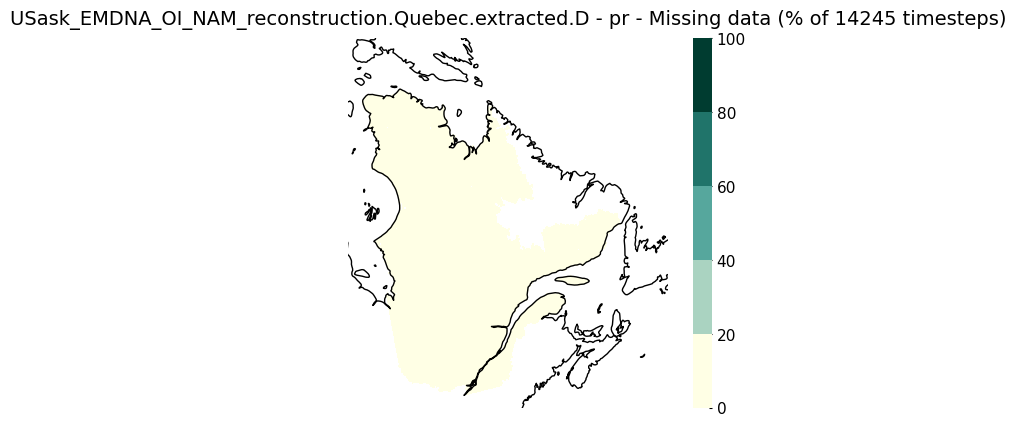

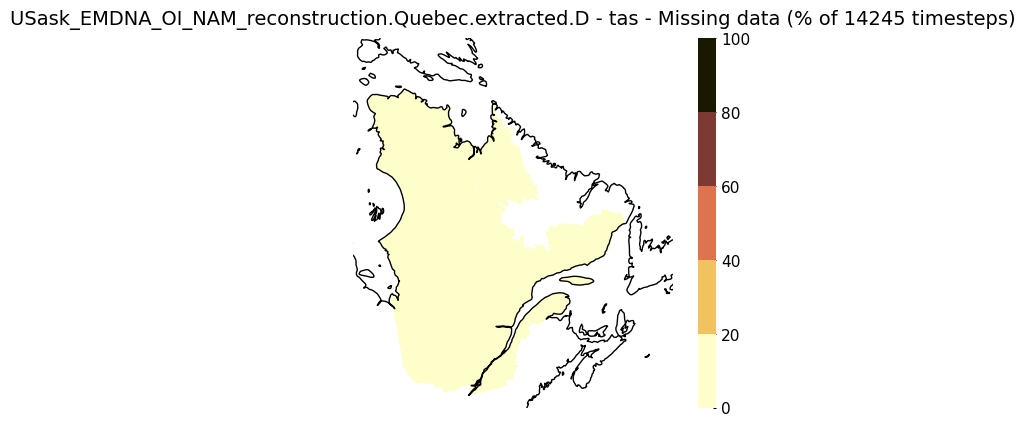

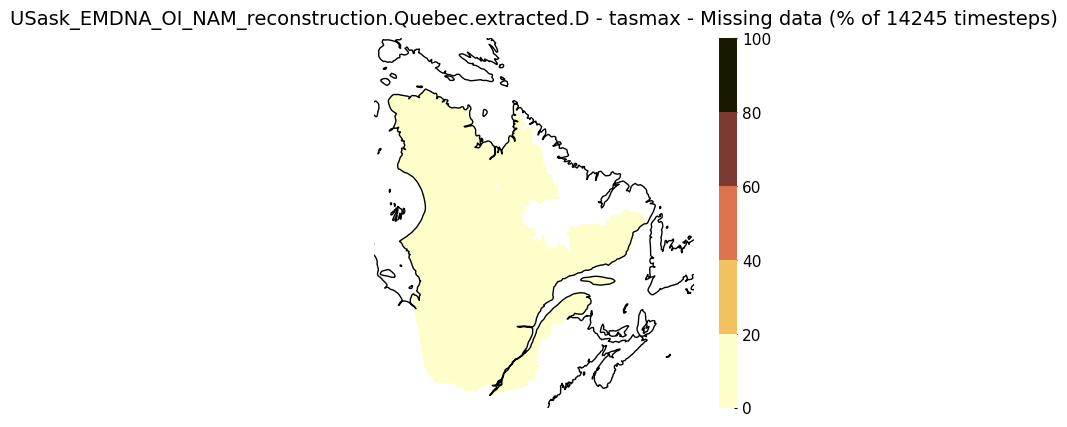

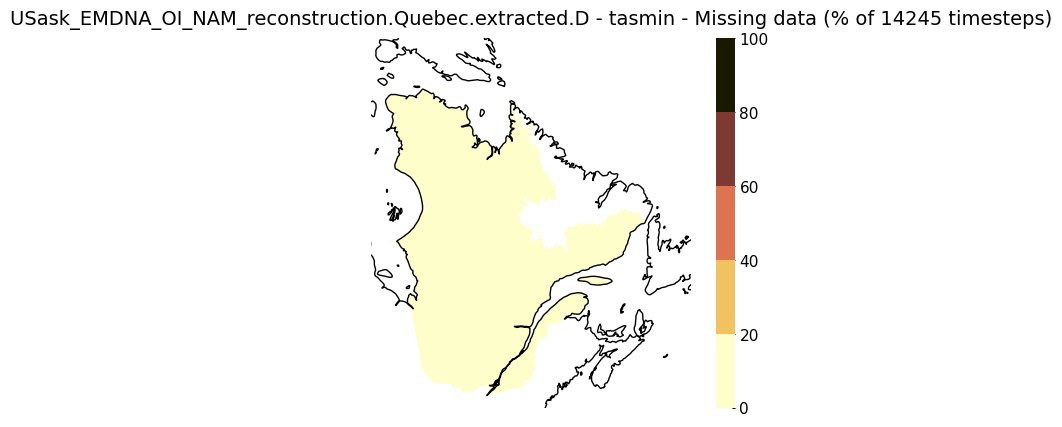

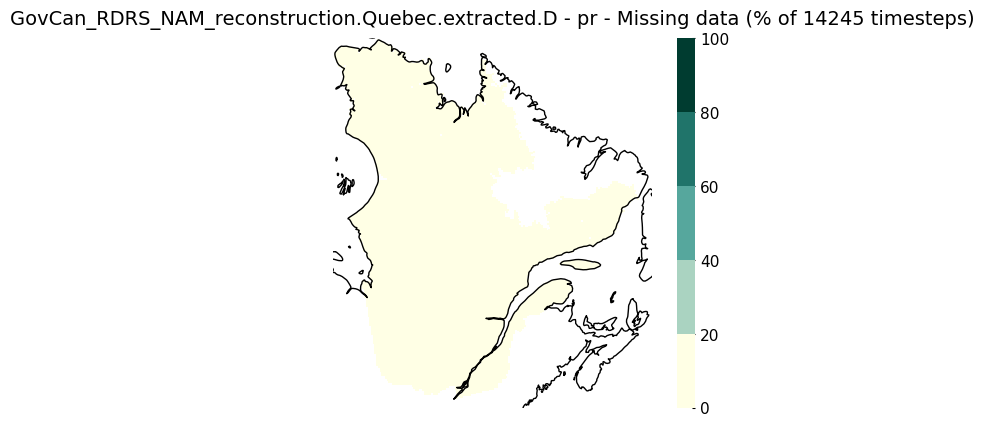

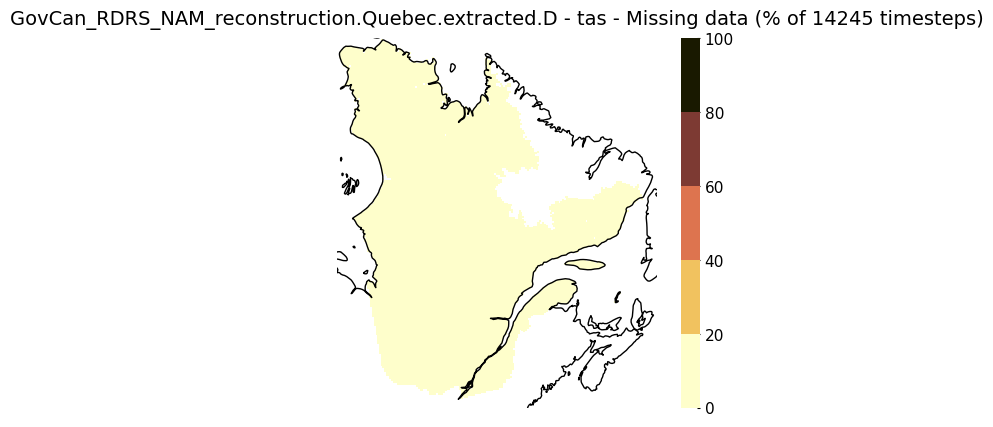

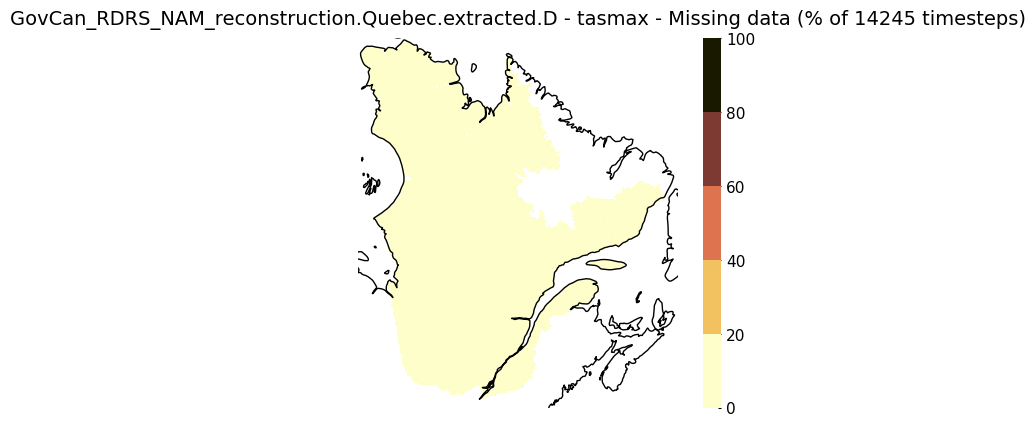

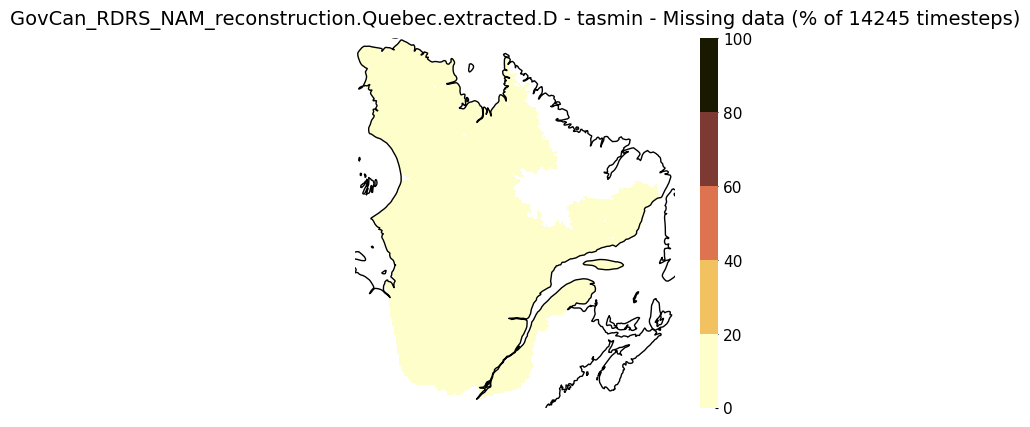

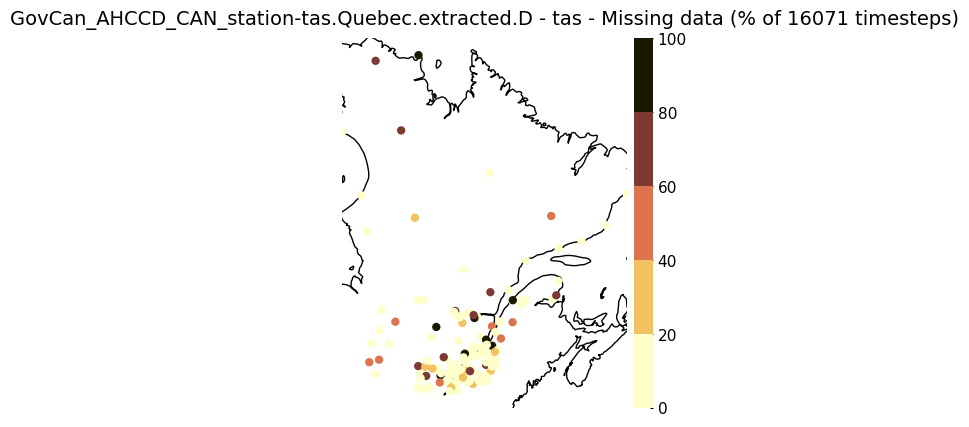

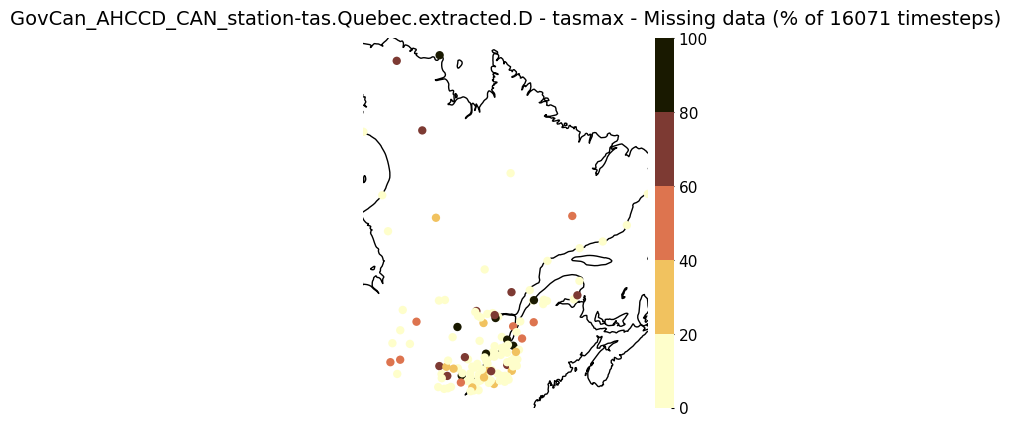

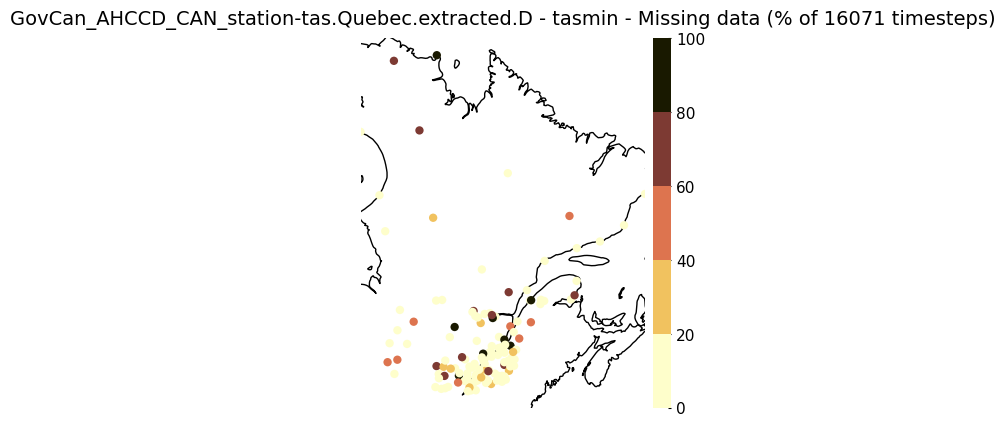

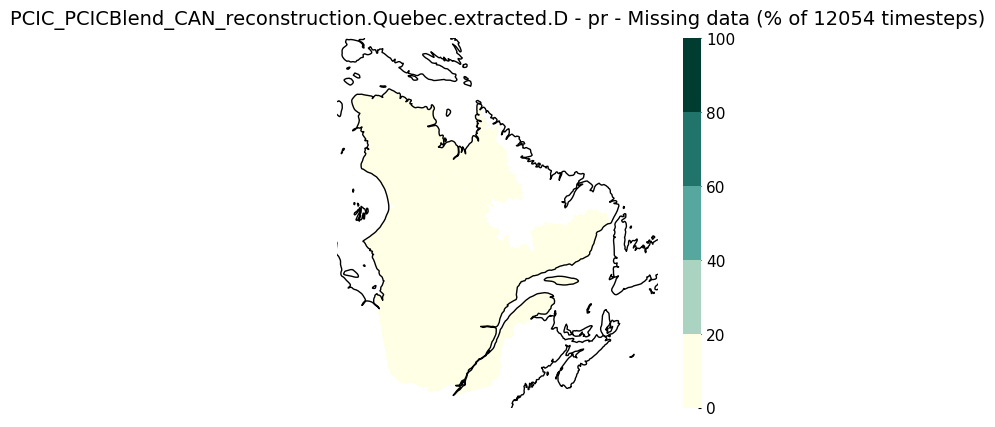

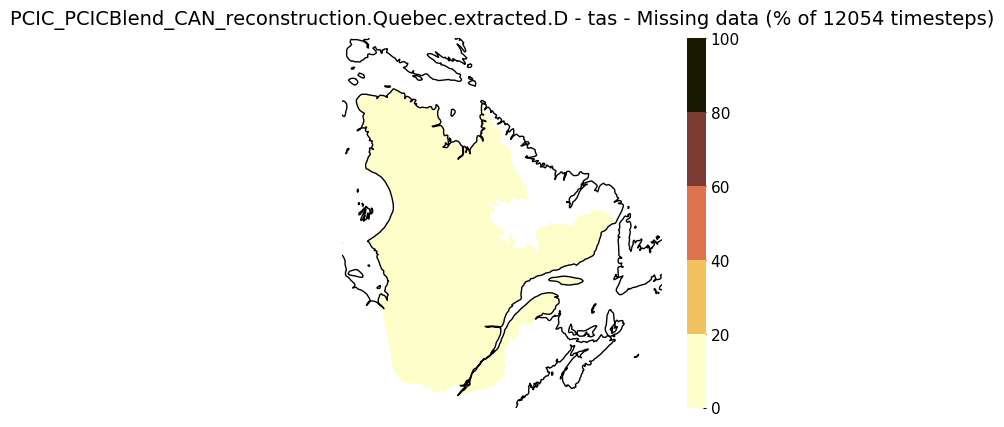

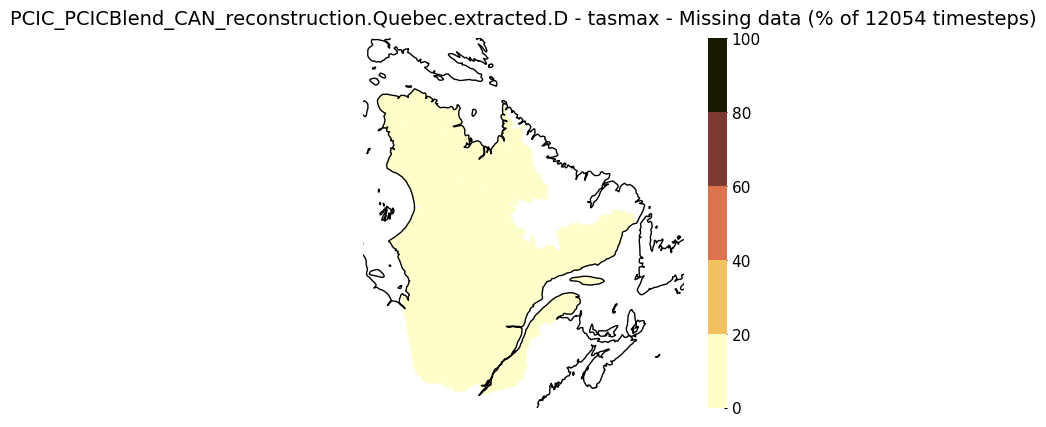

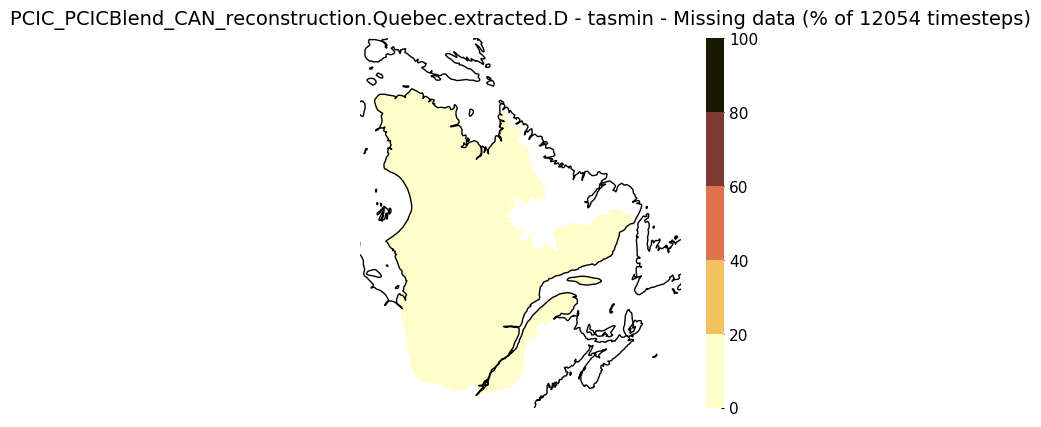

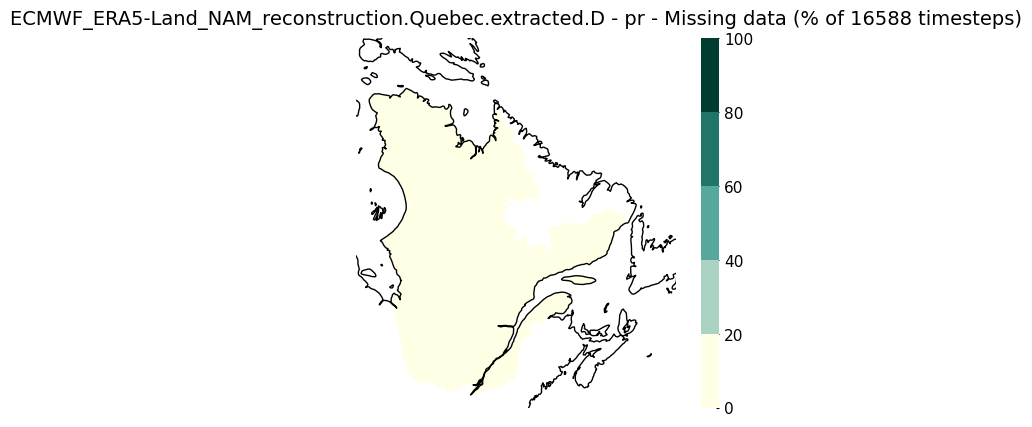

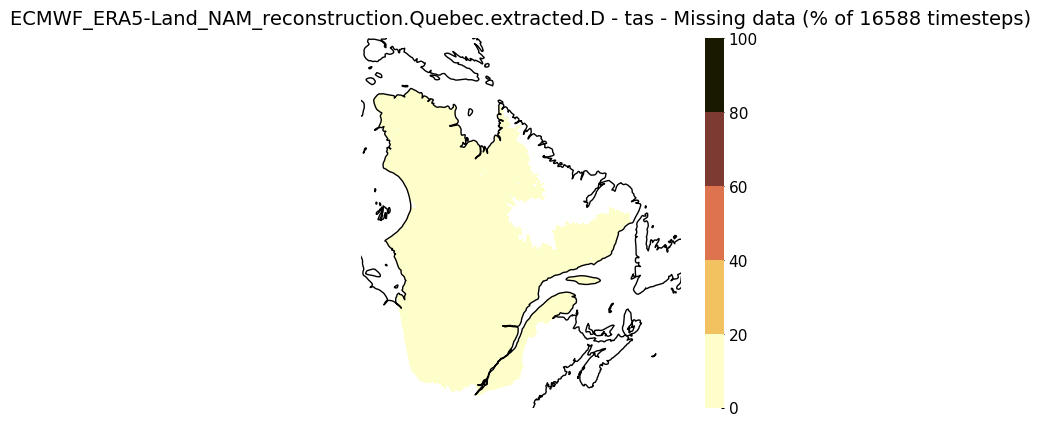

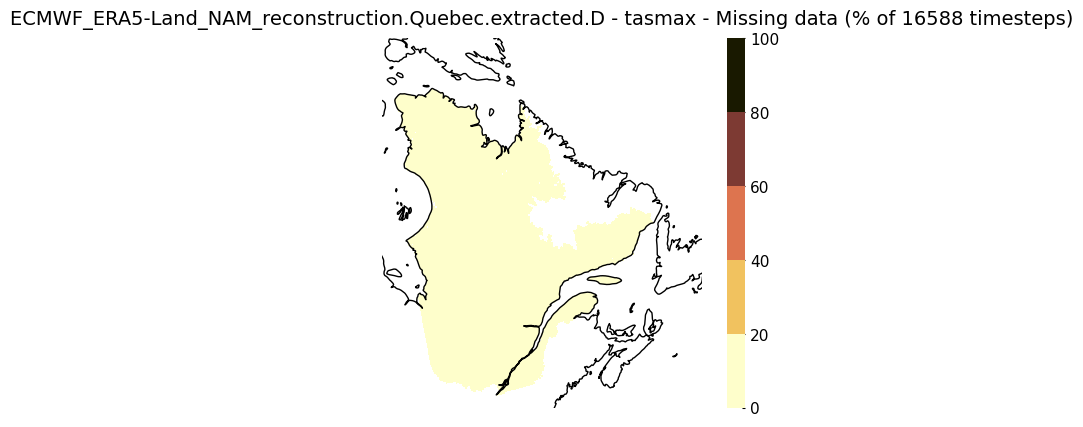

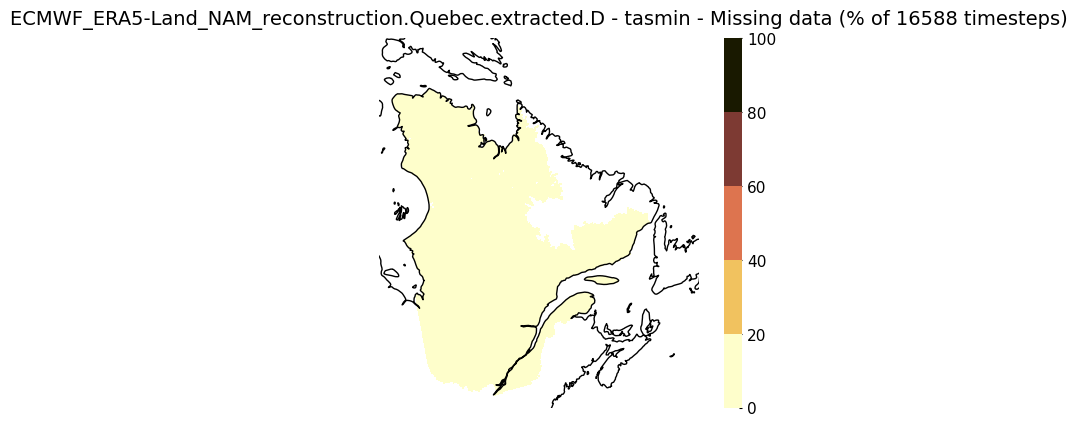

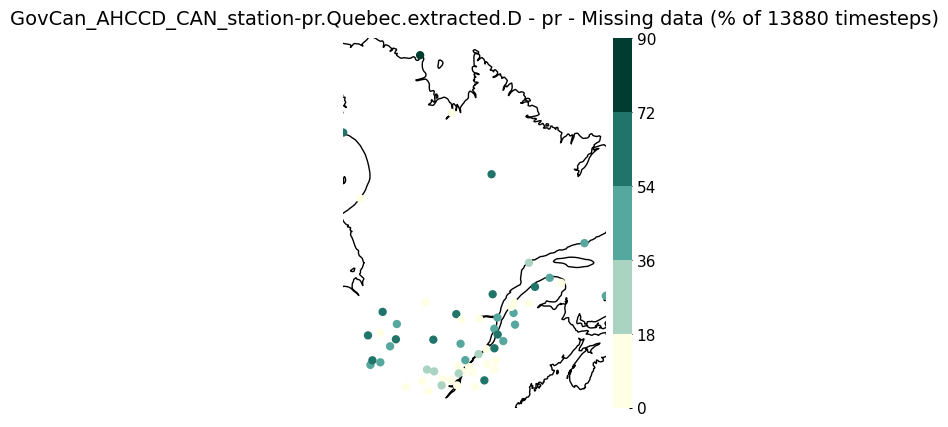

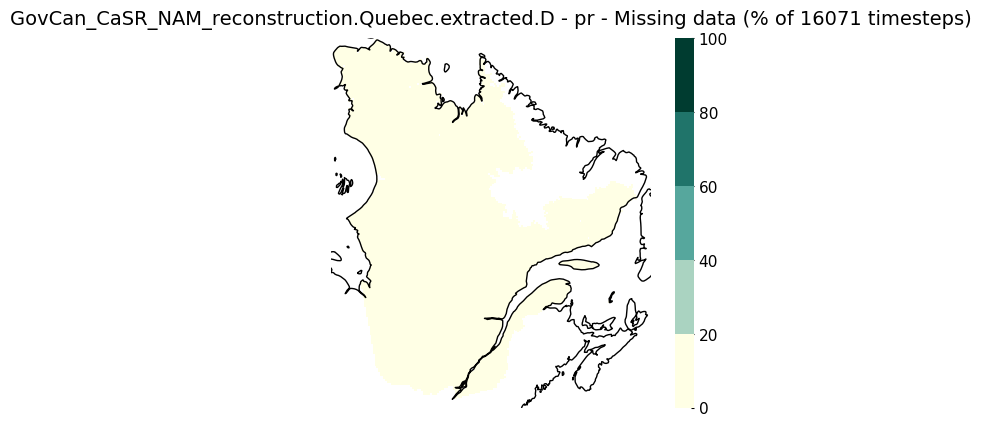

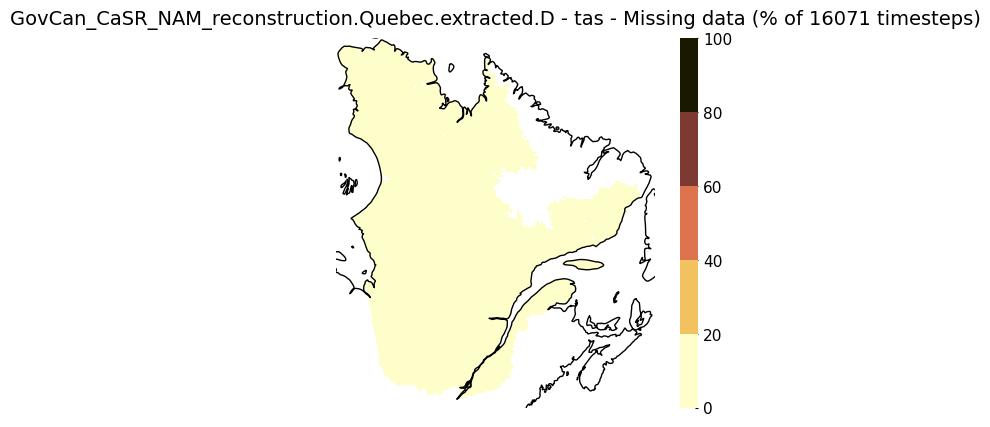

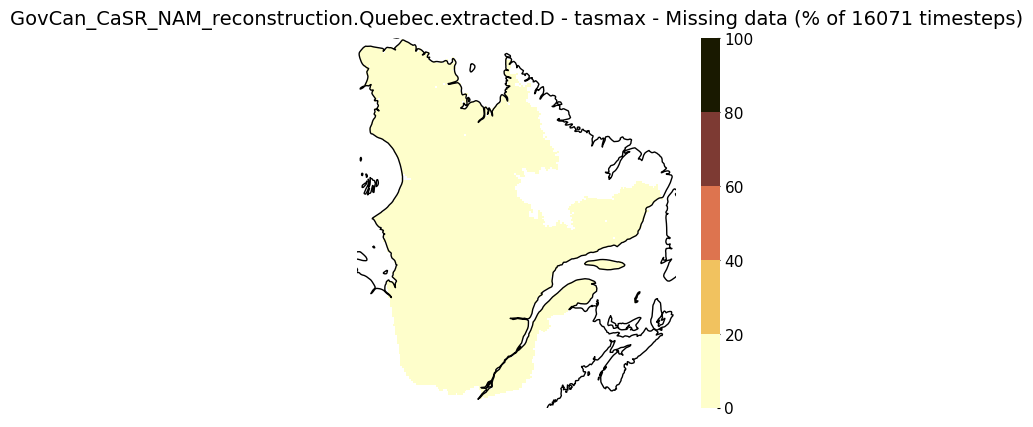

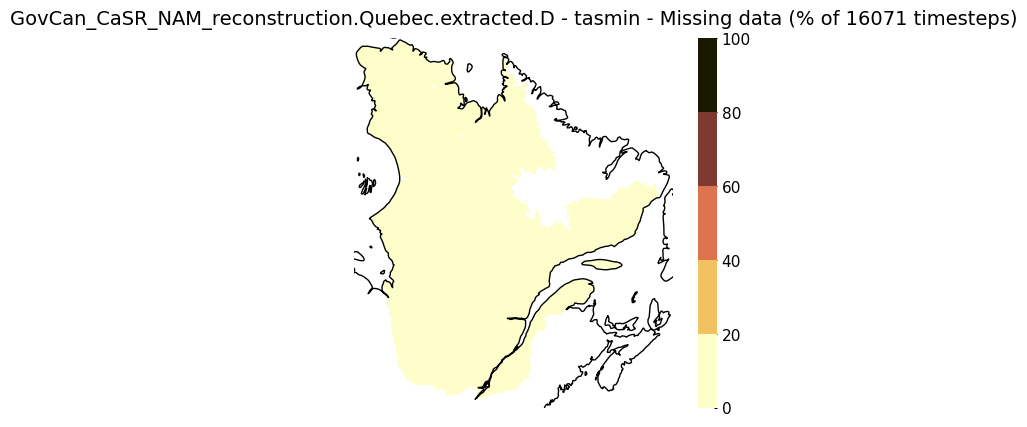

In [4]:
plot_missing_percentage(processing_level='extracted')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "long_name" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "long_name" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/

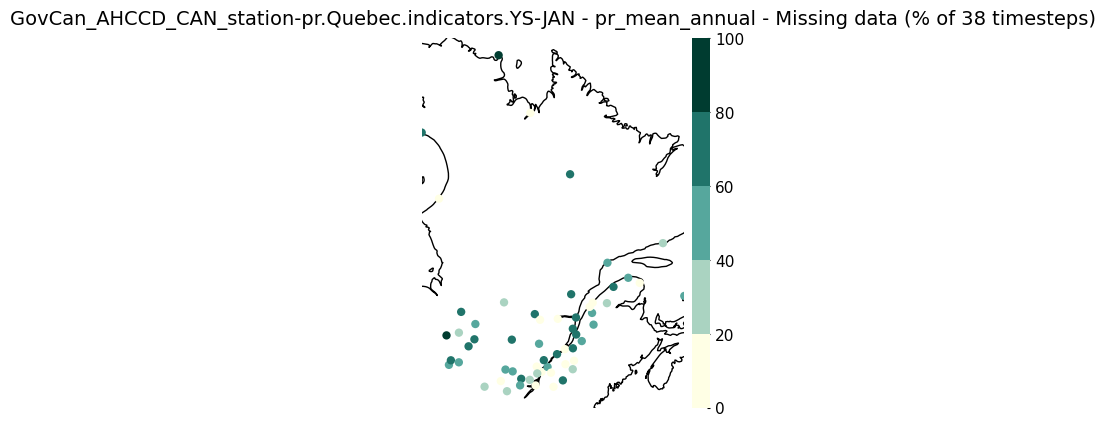

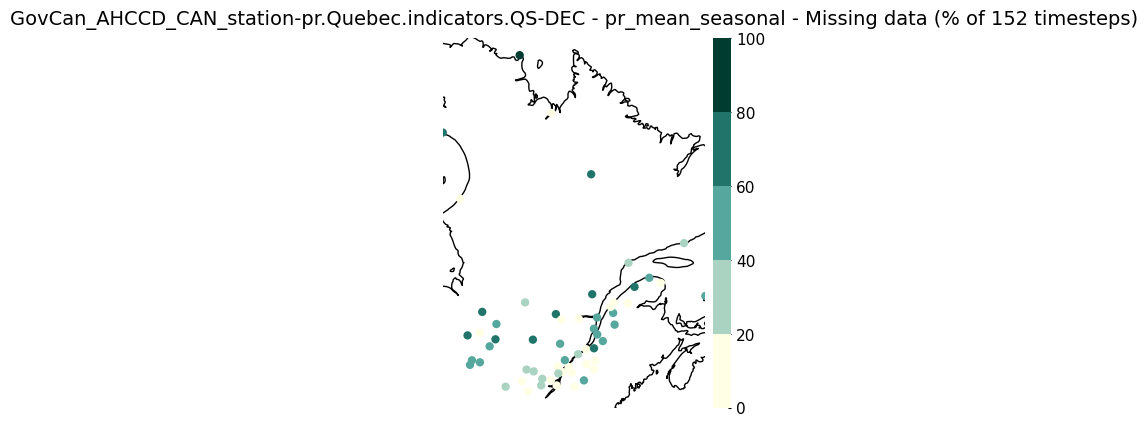

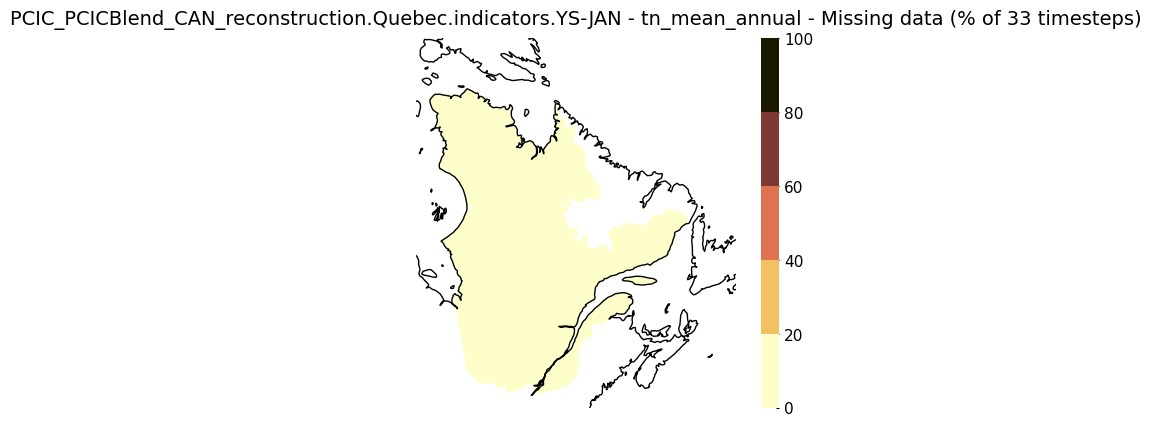

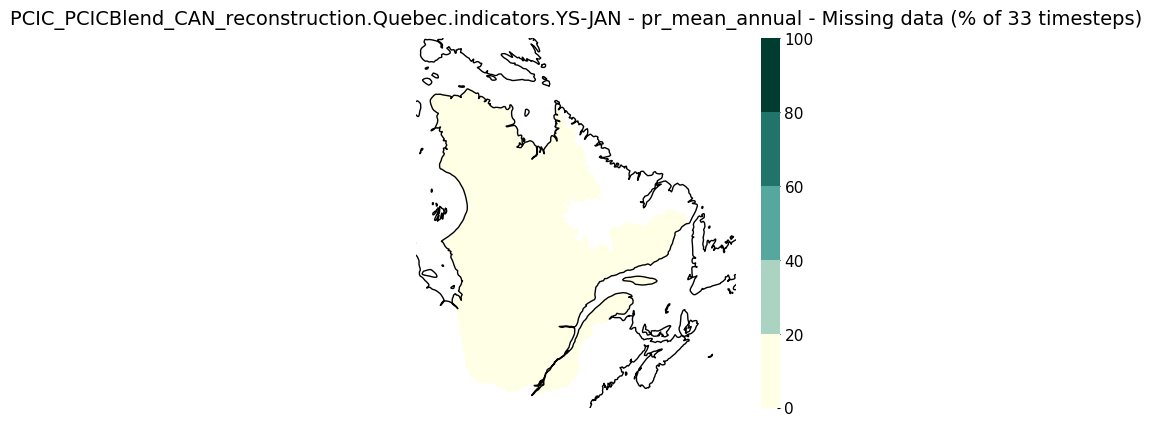

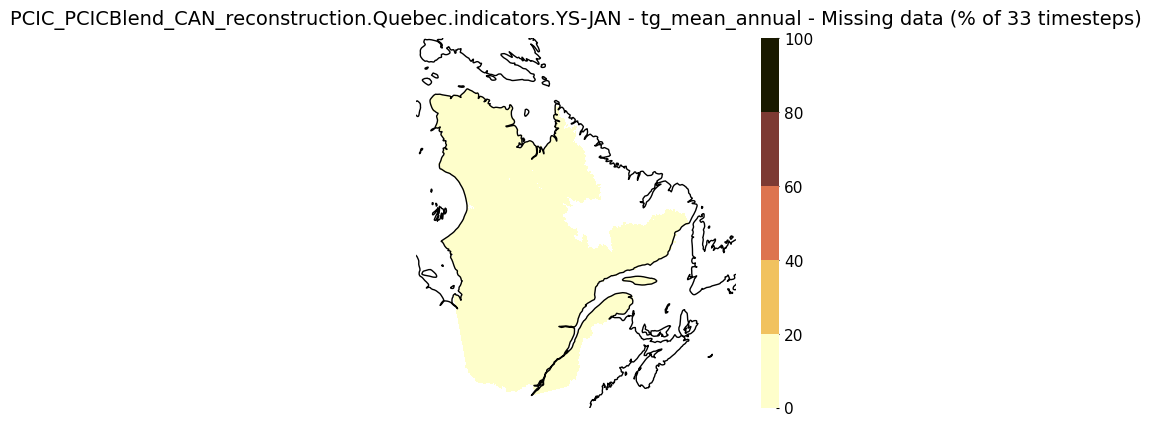

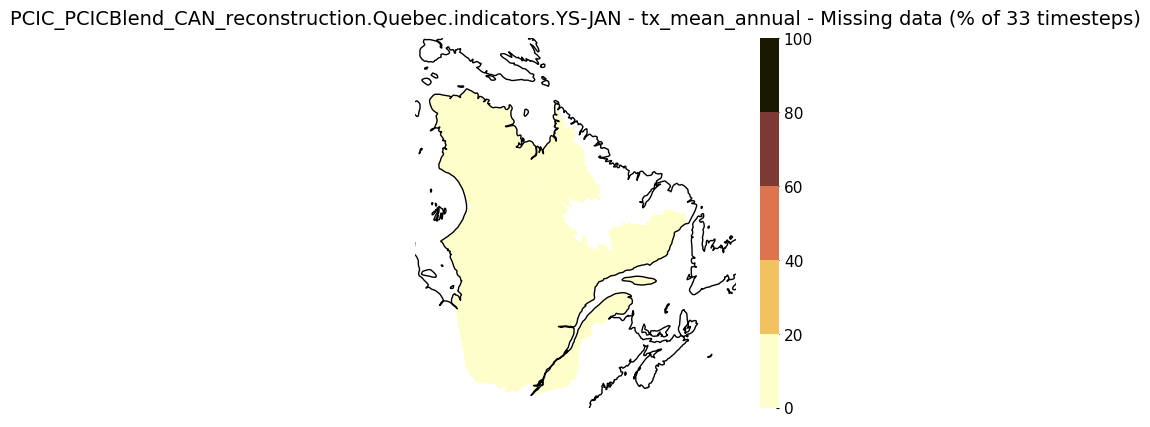

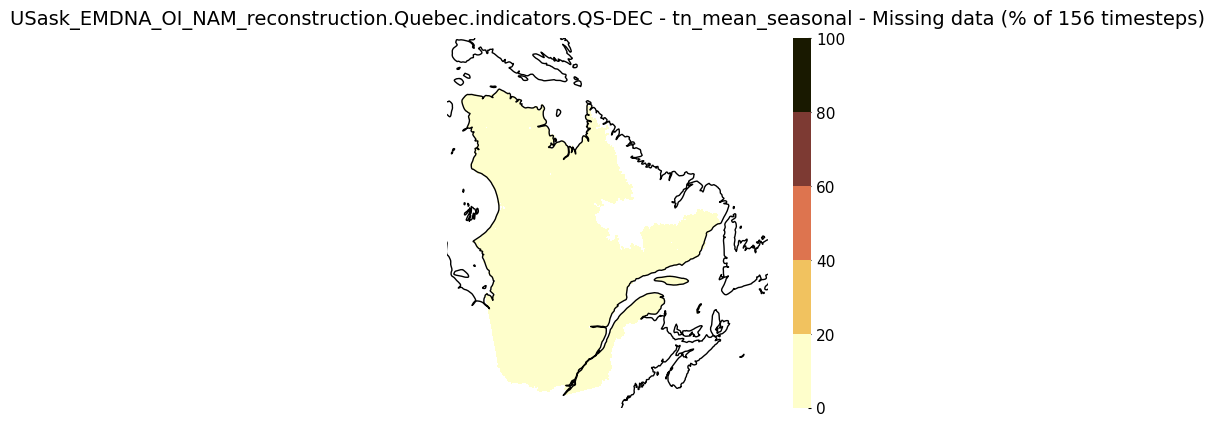

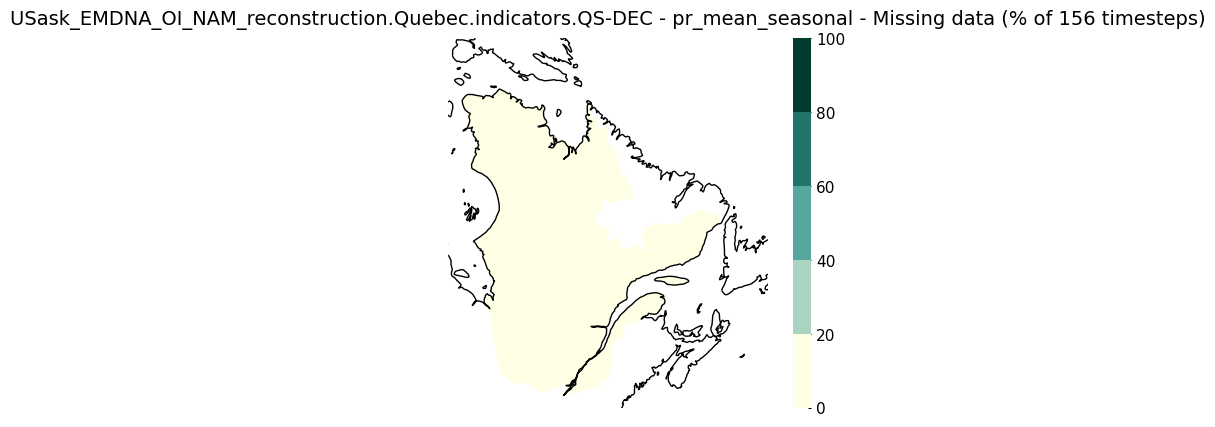

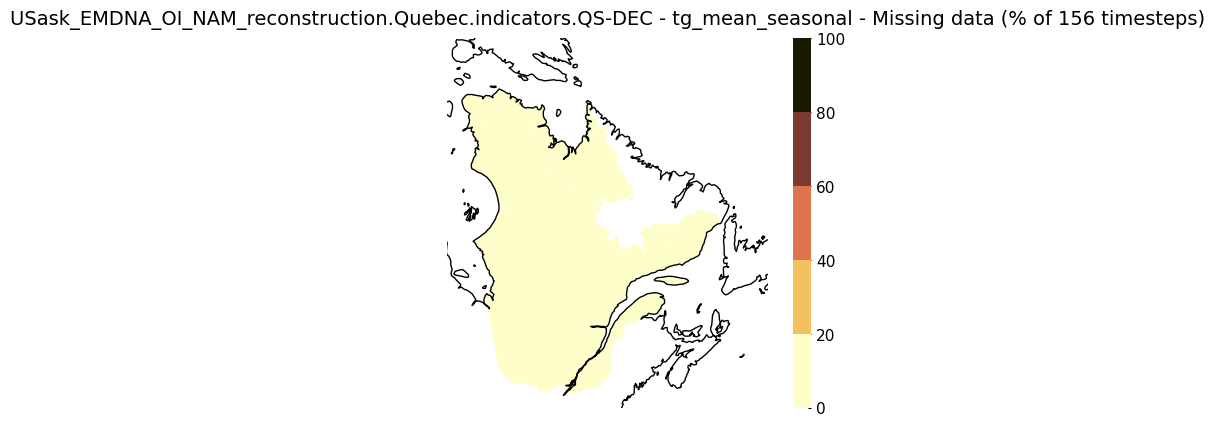

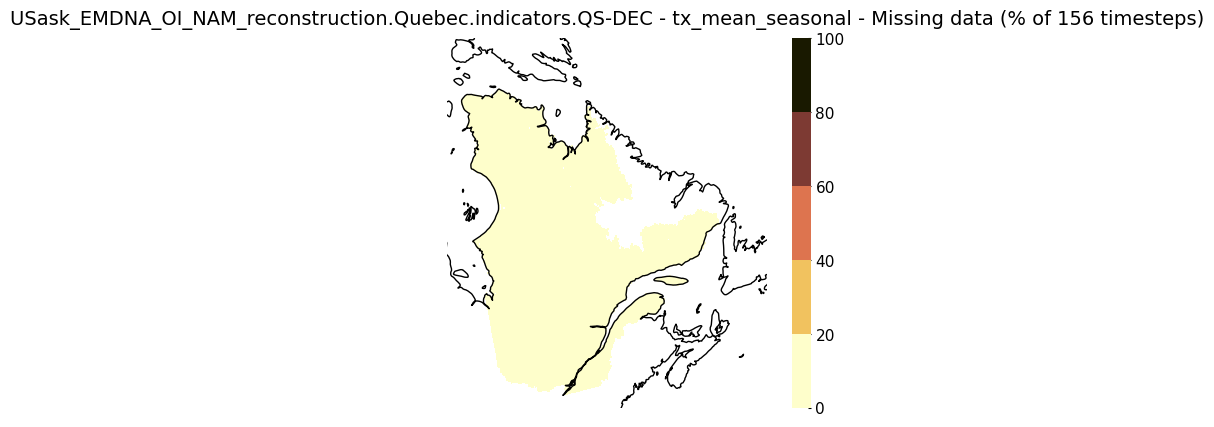

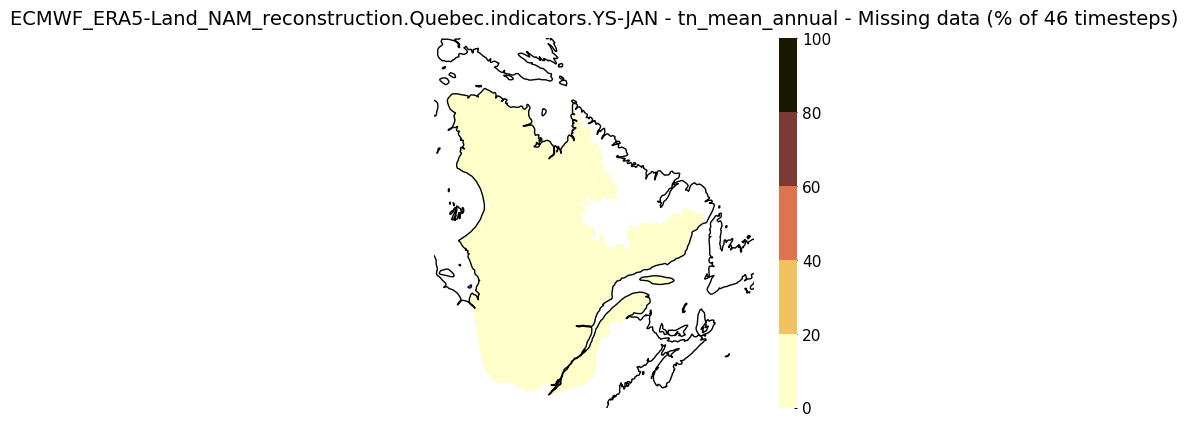

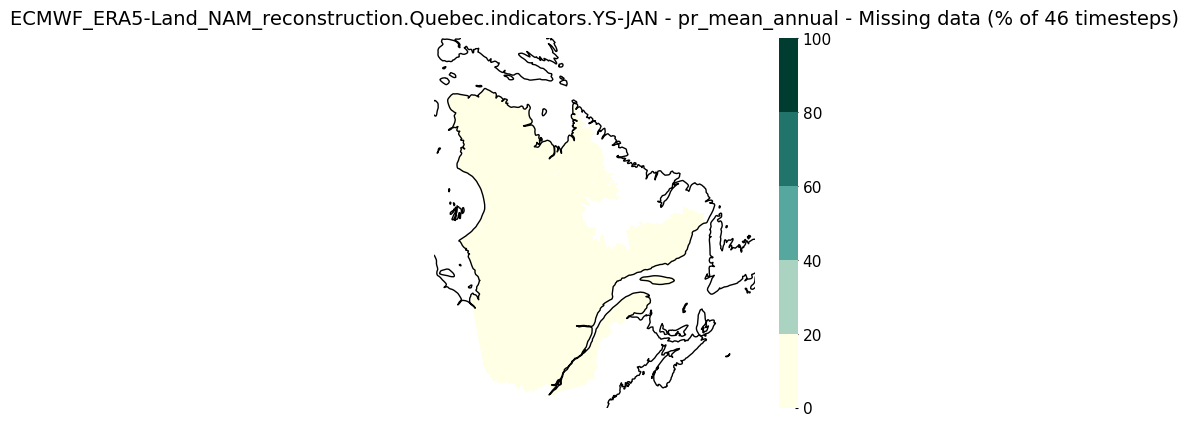

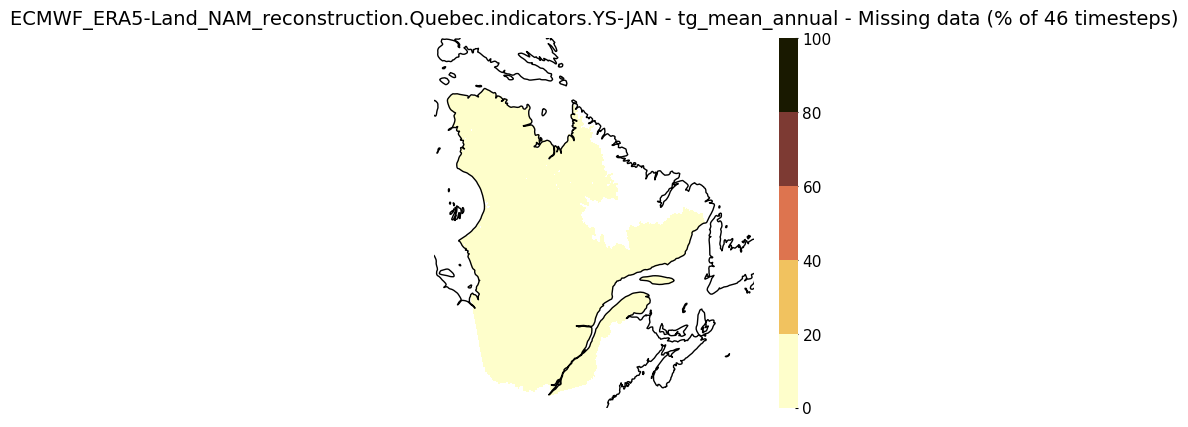

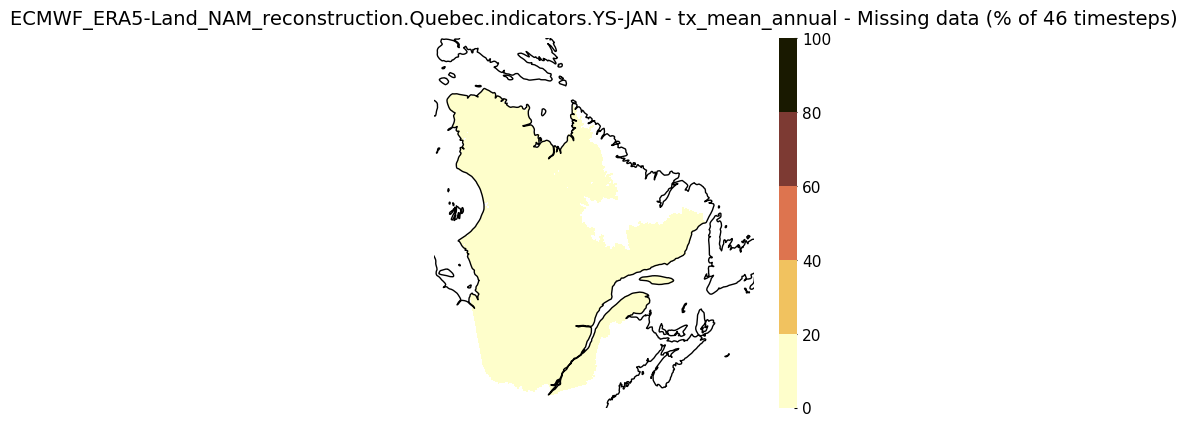

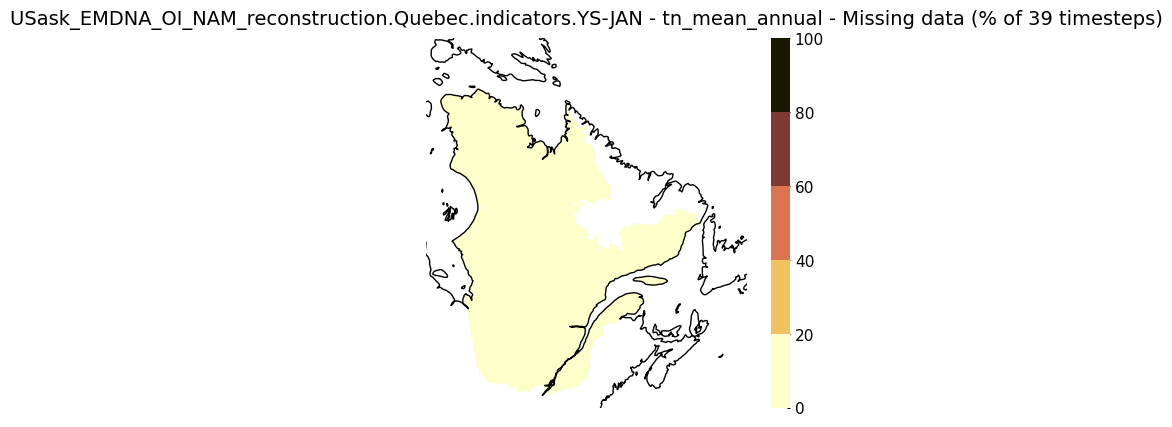

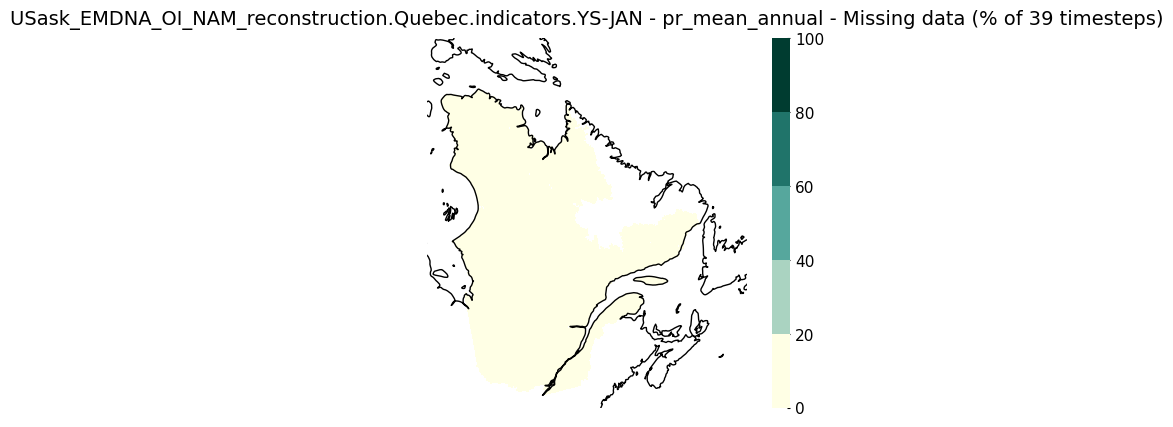

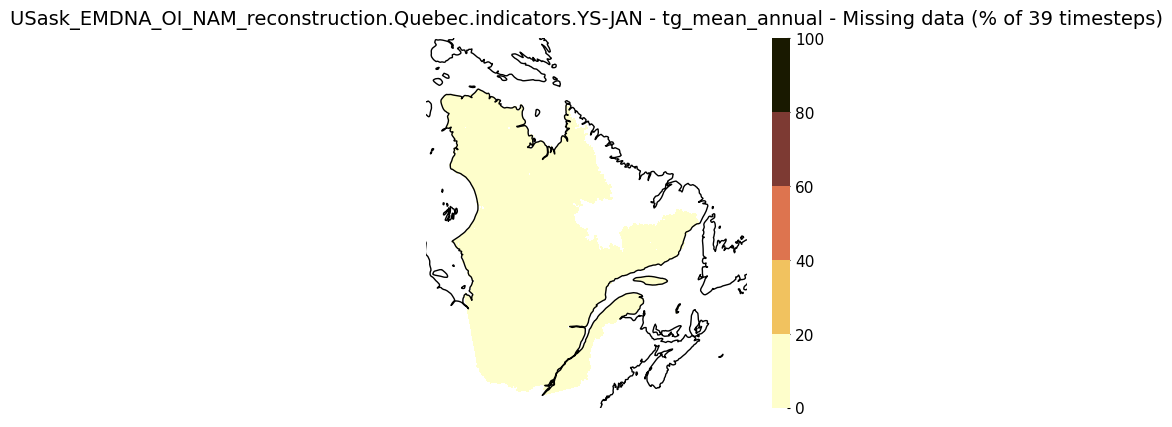

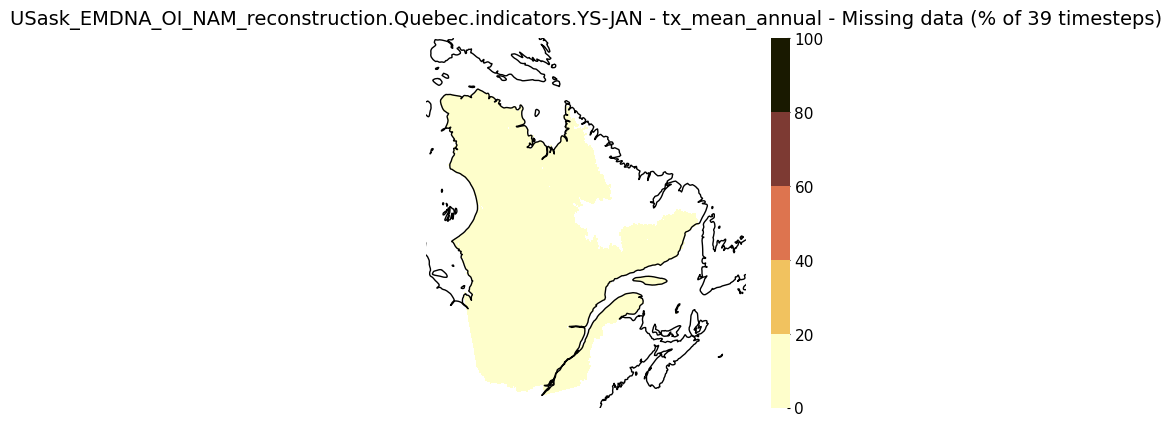

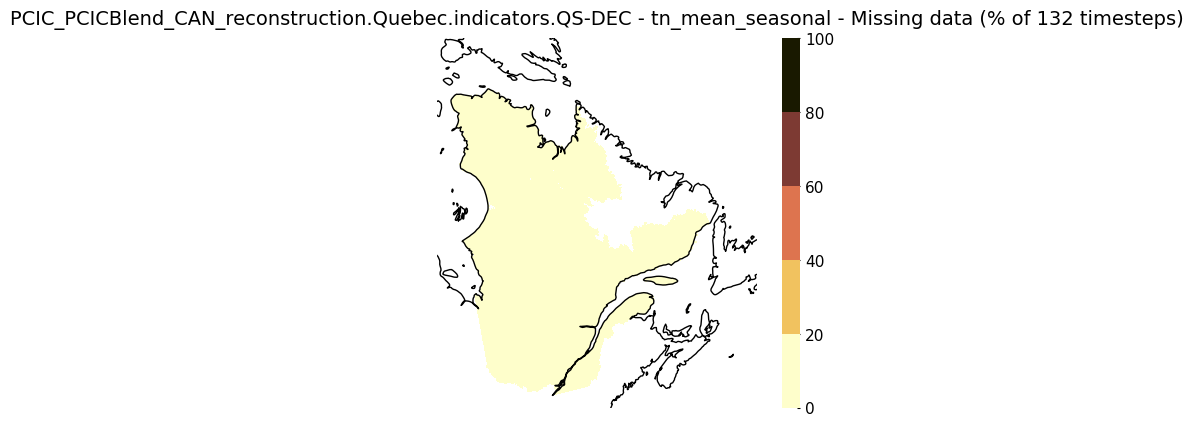

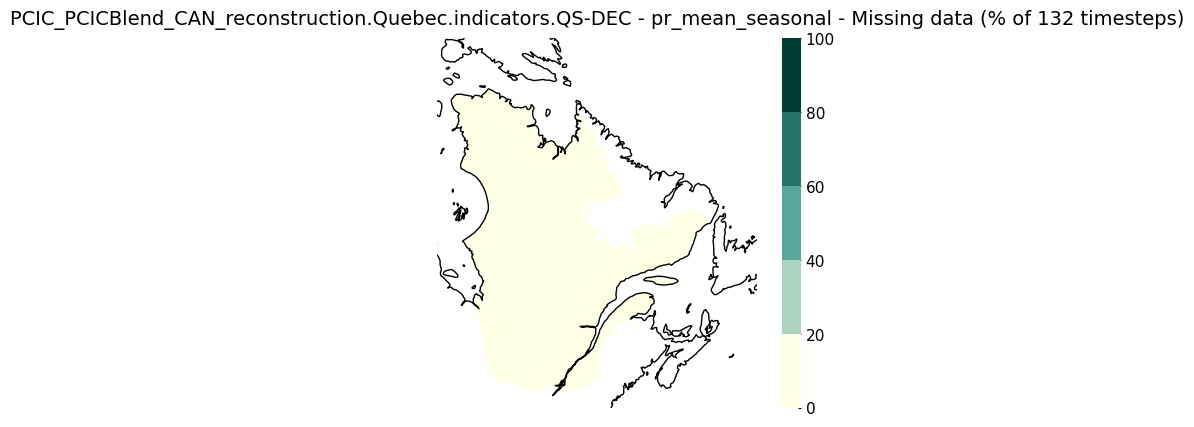

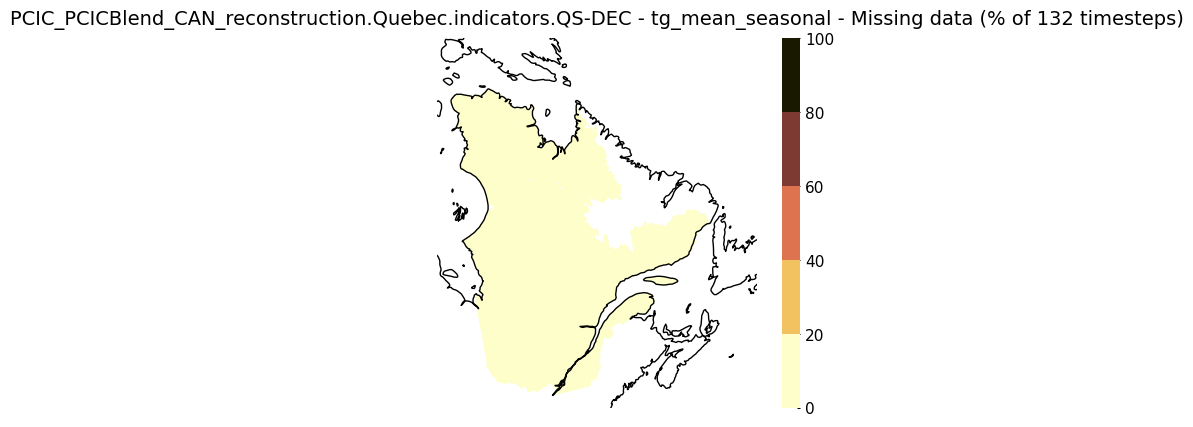

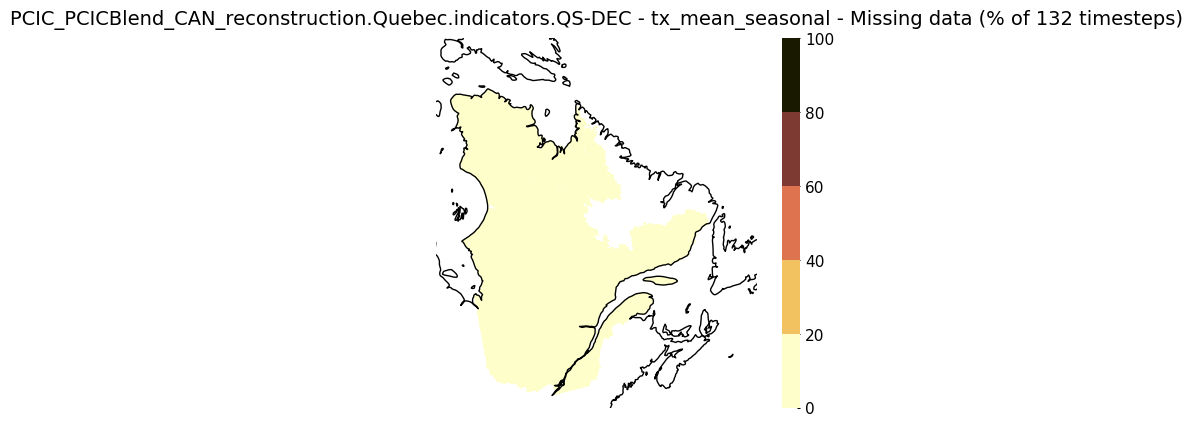

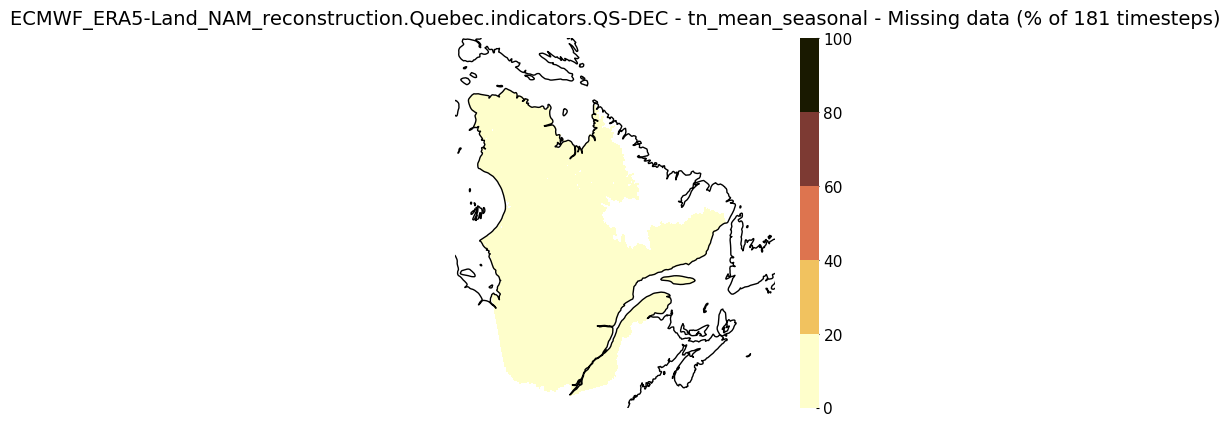

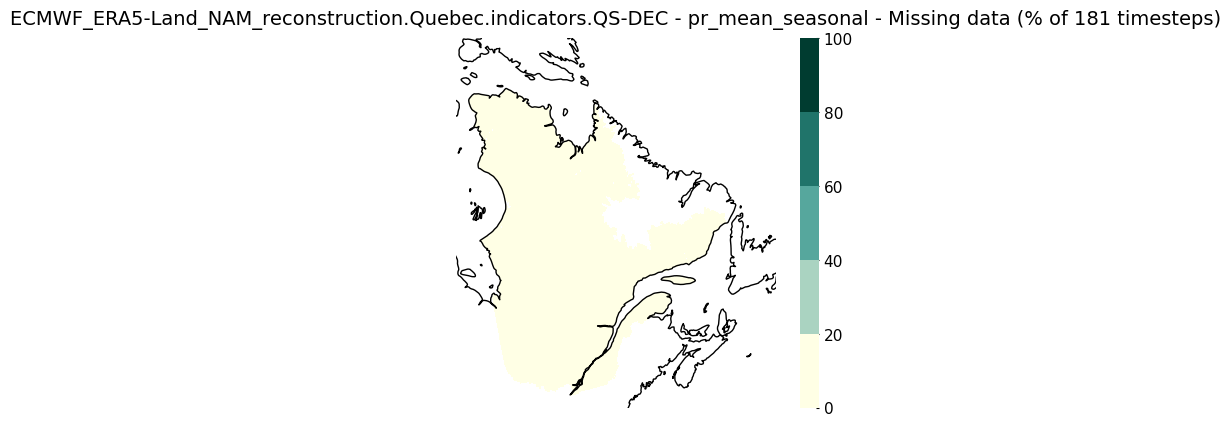

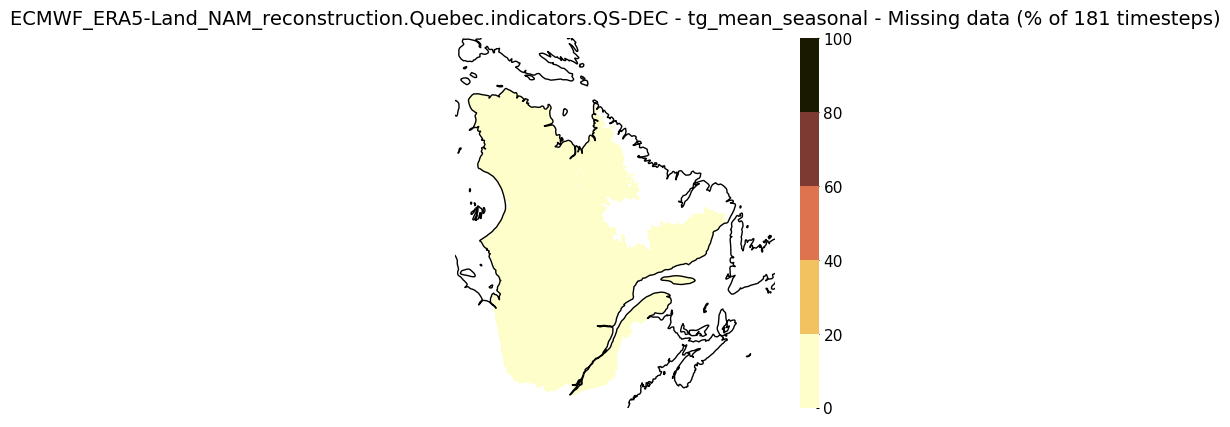

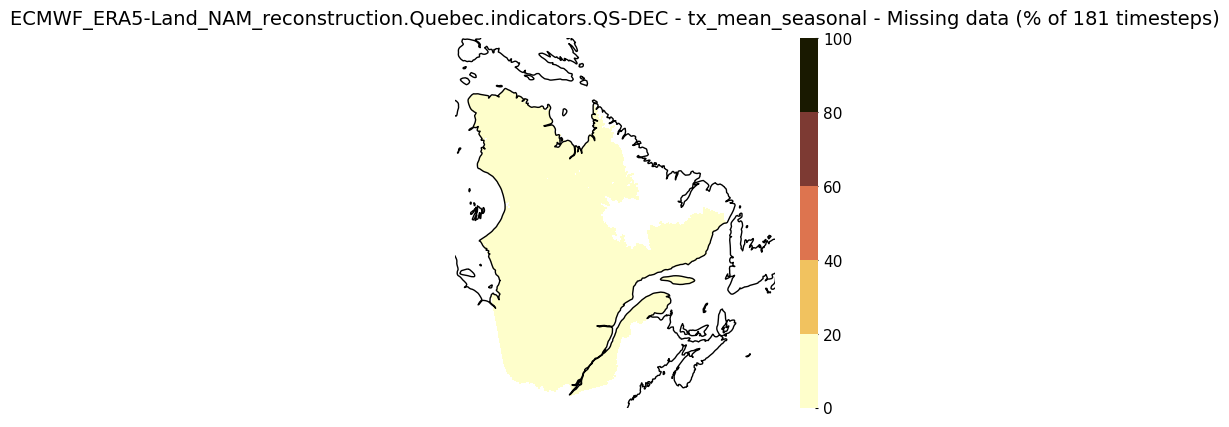

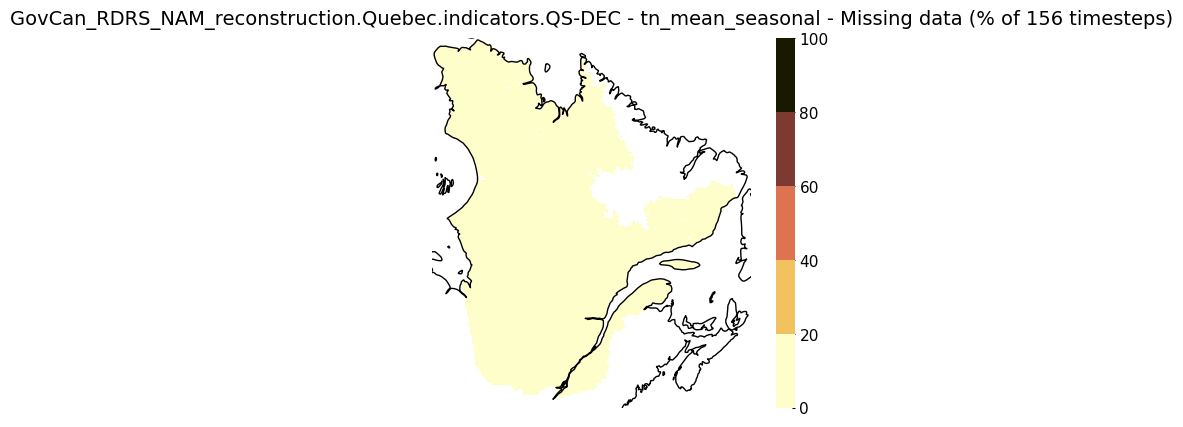

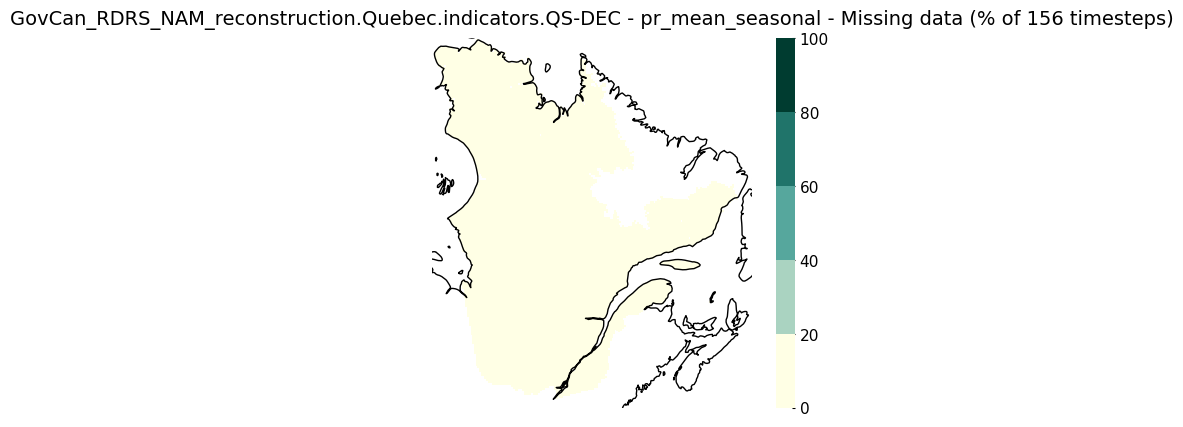

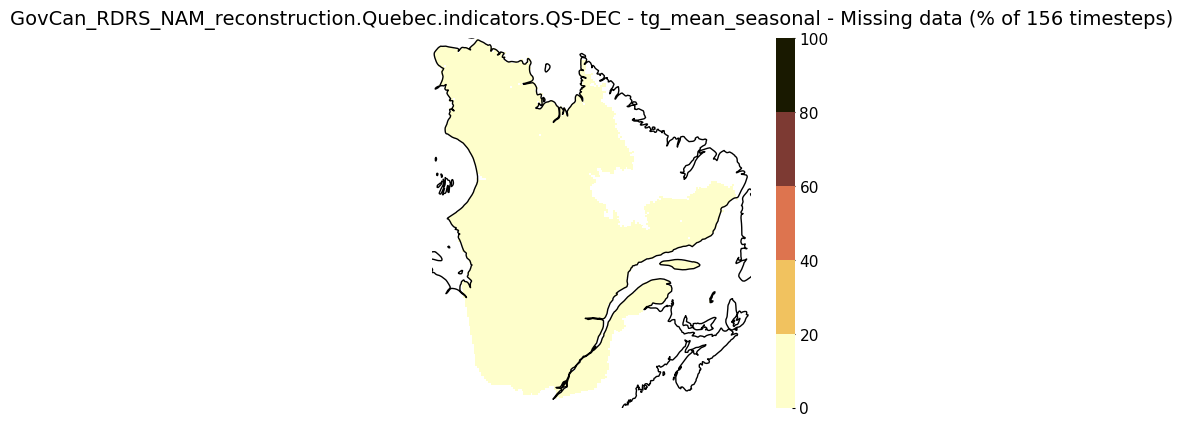

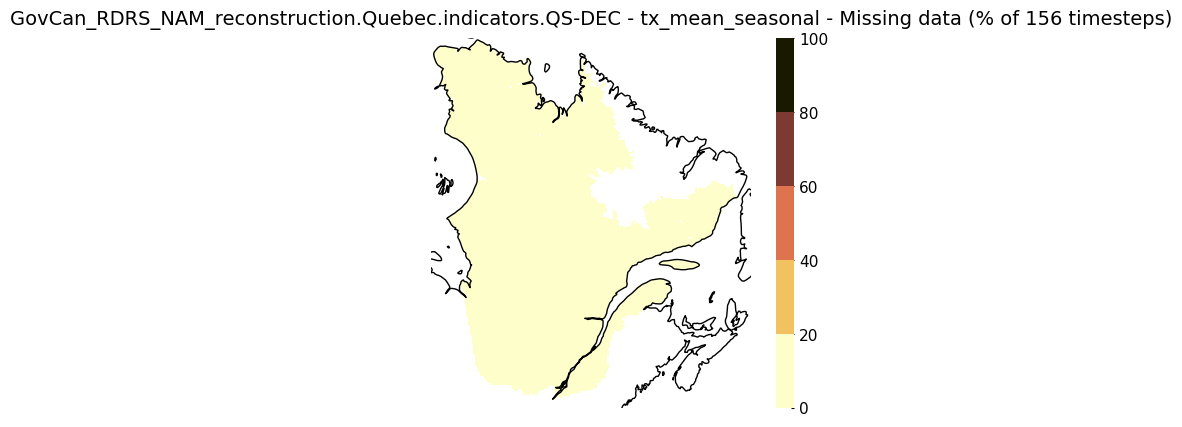

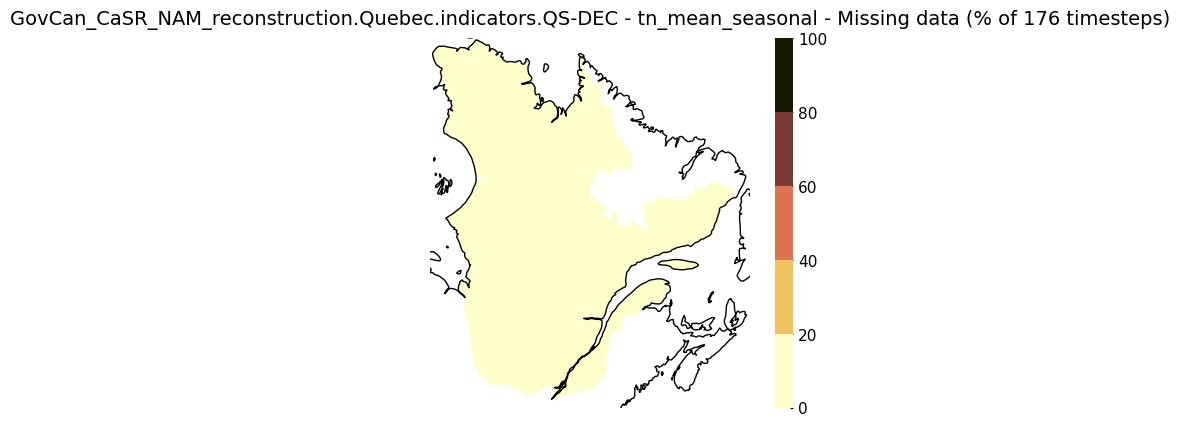

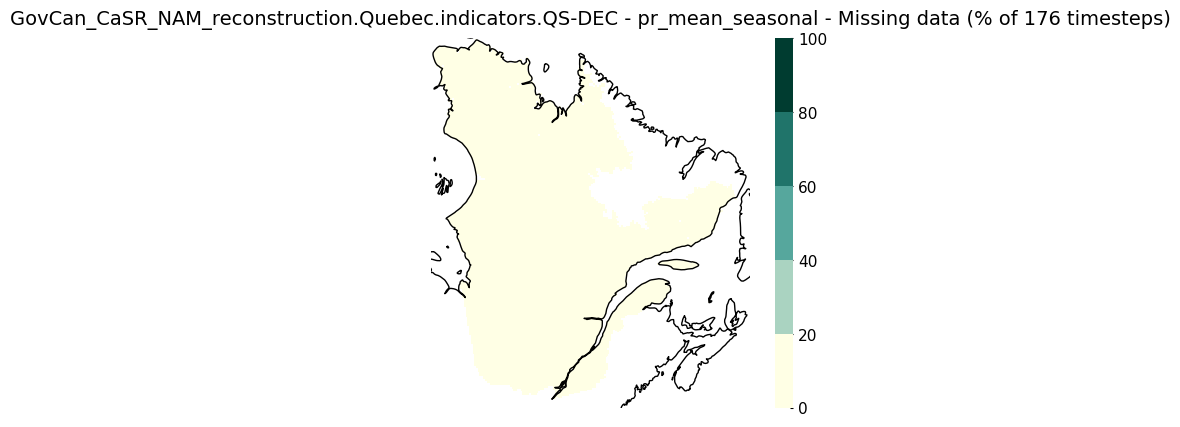

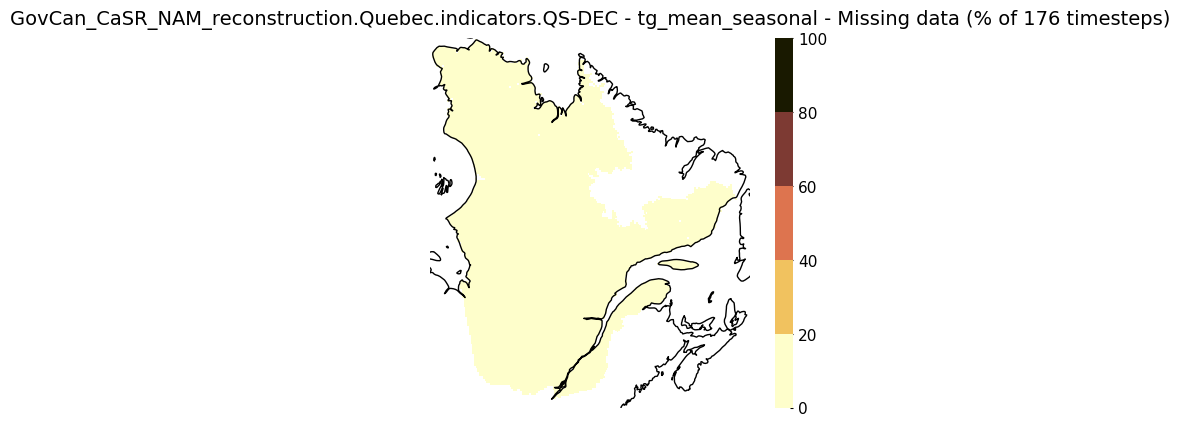

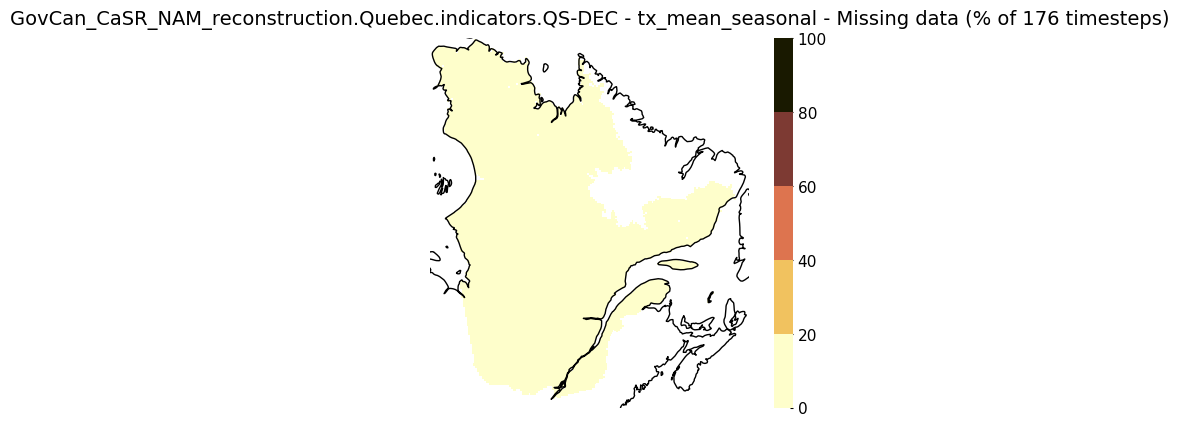

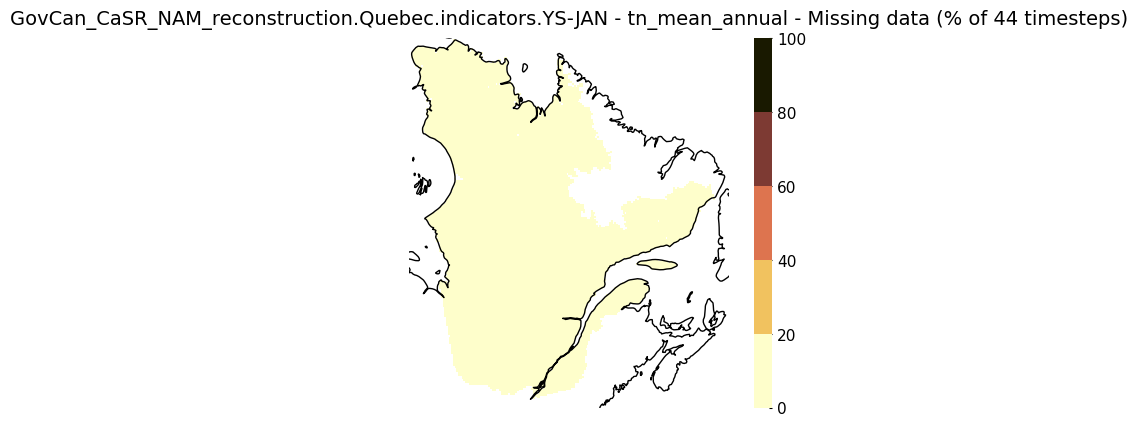

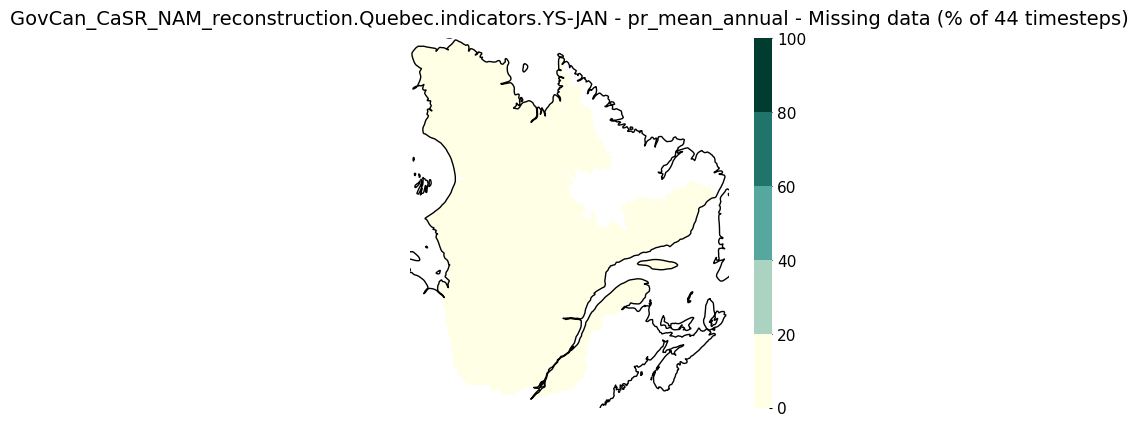

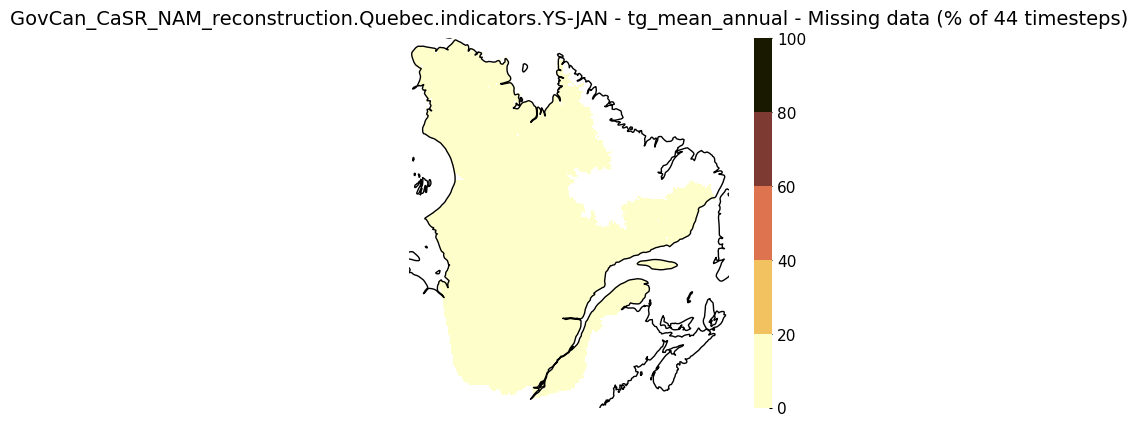

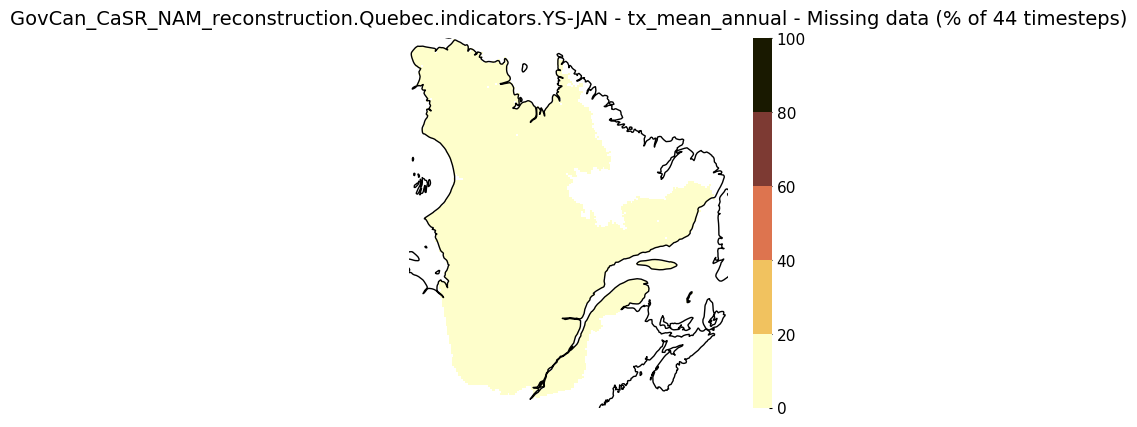

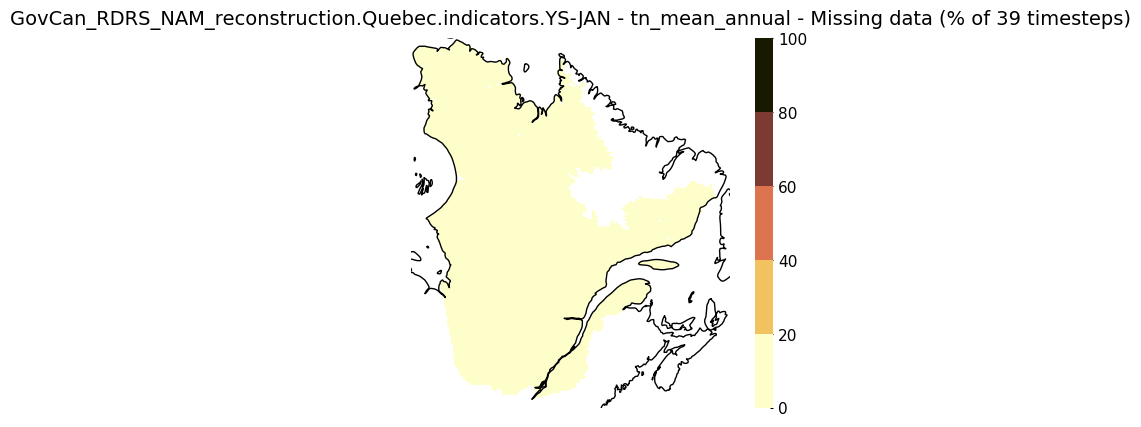

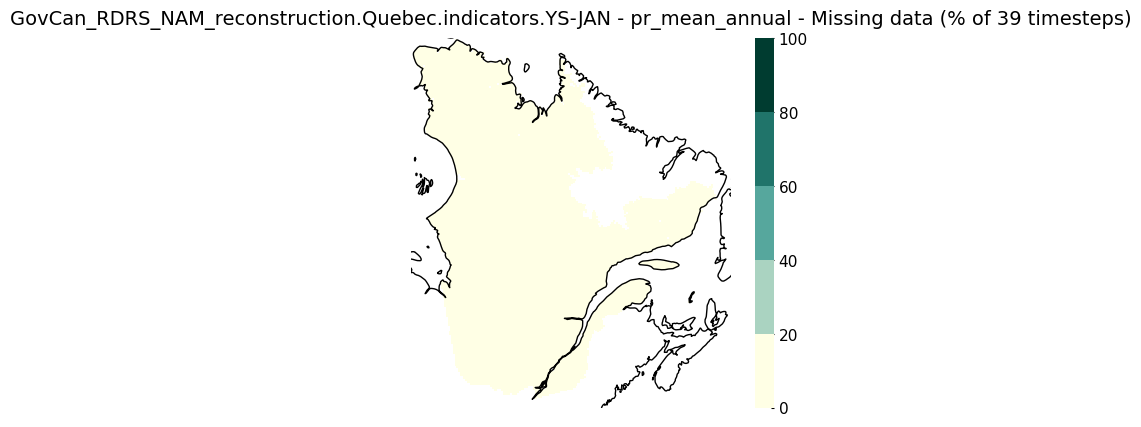

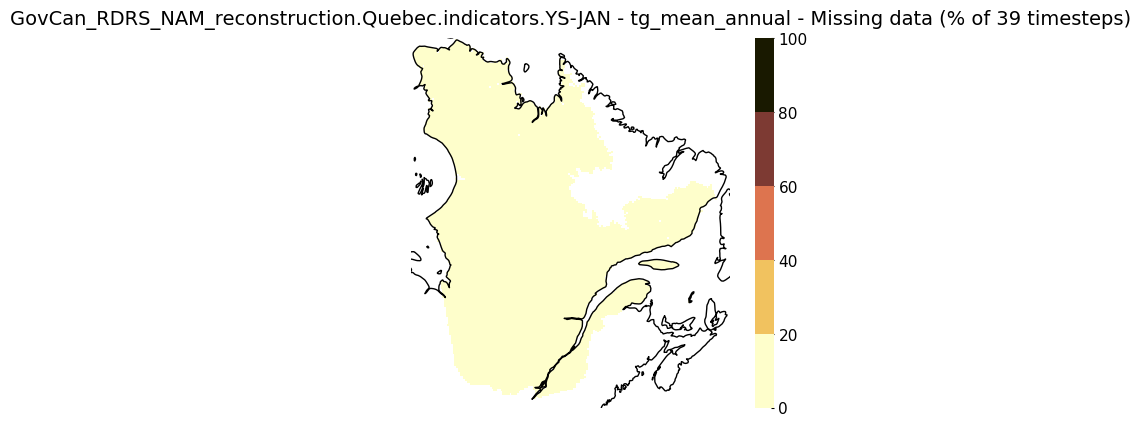

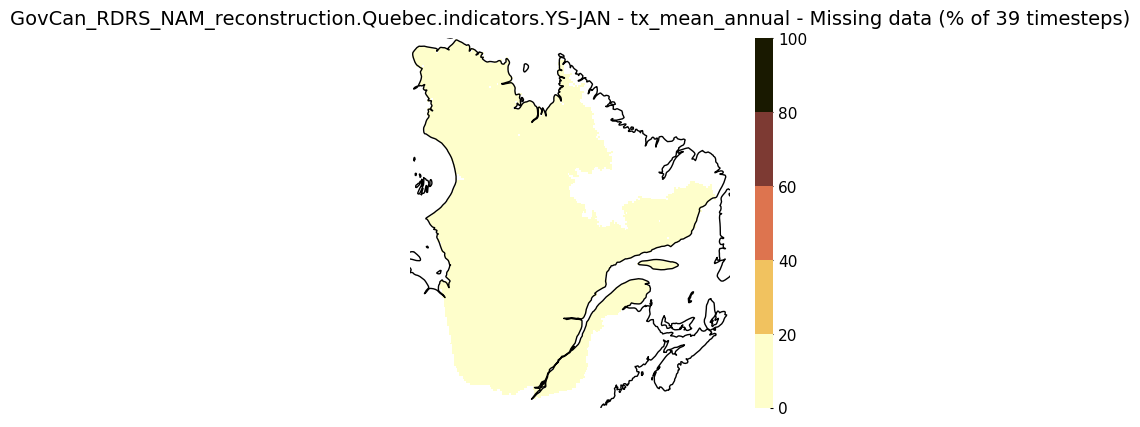

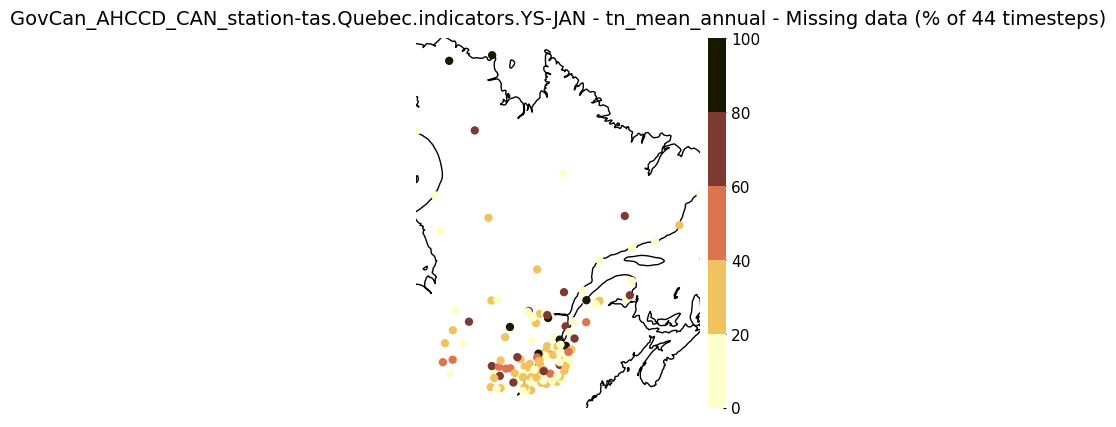

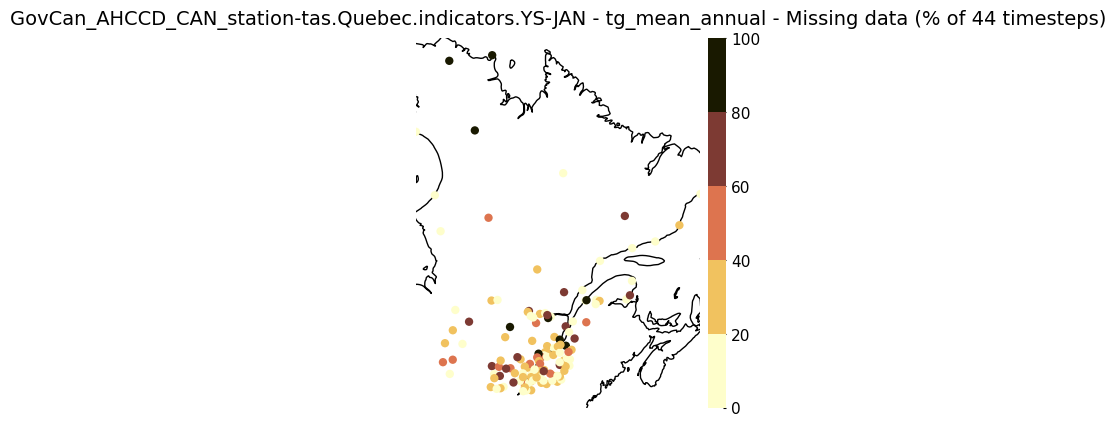

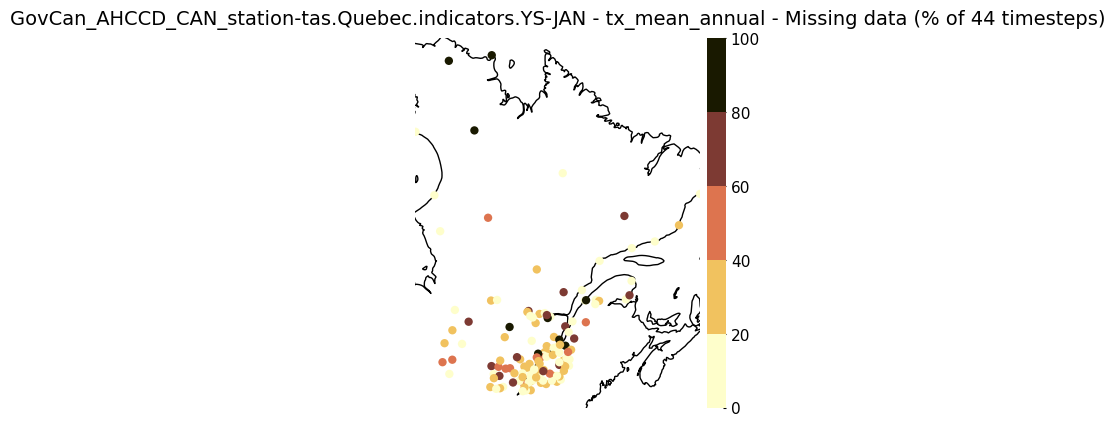

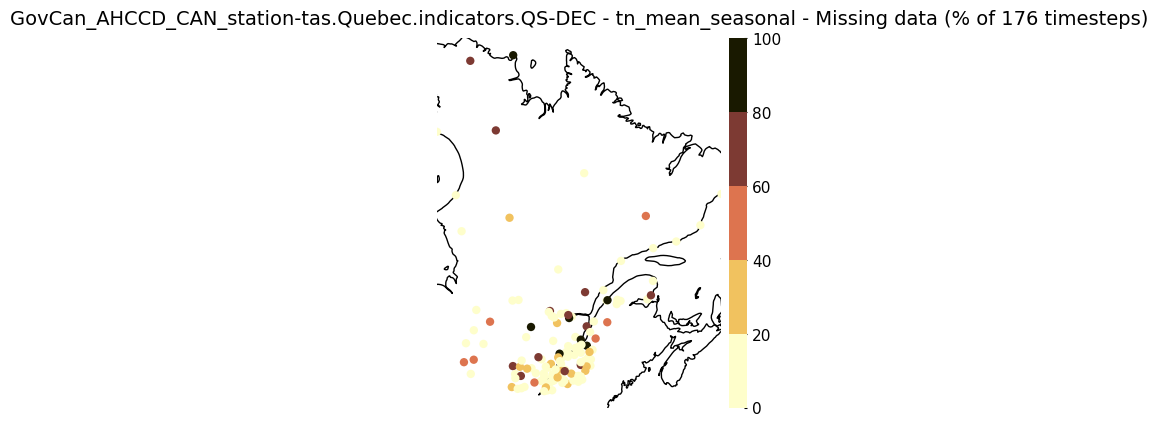

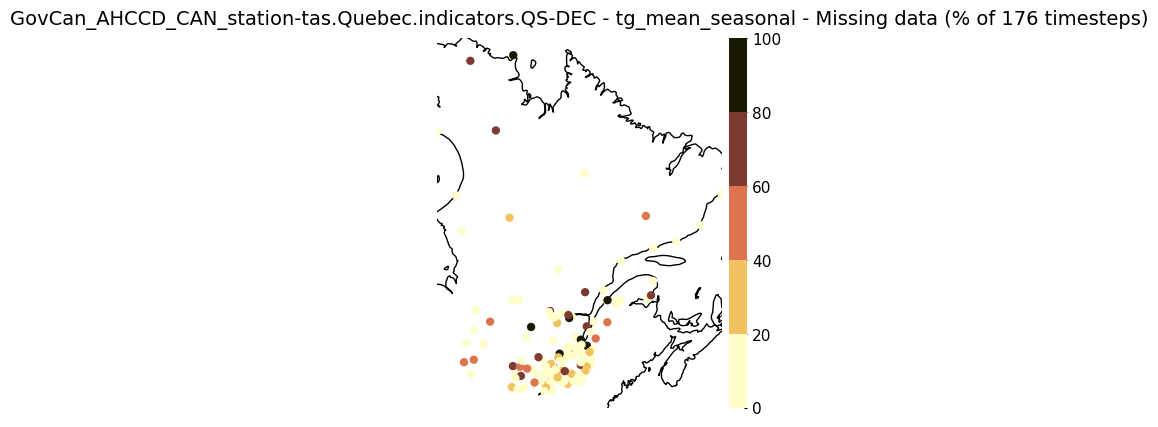

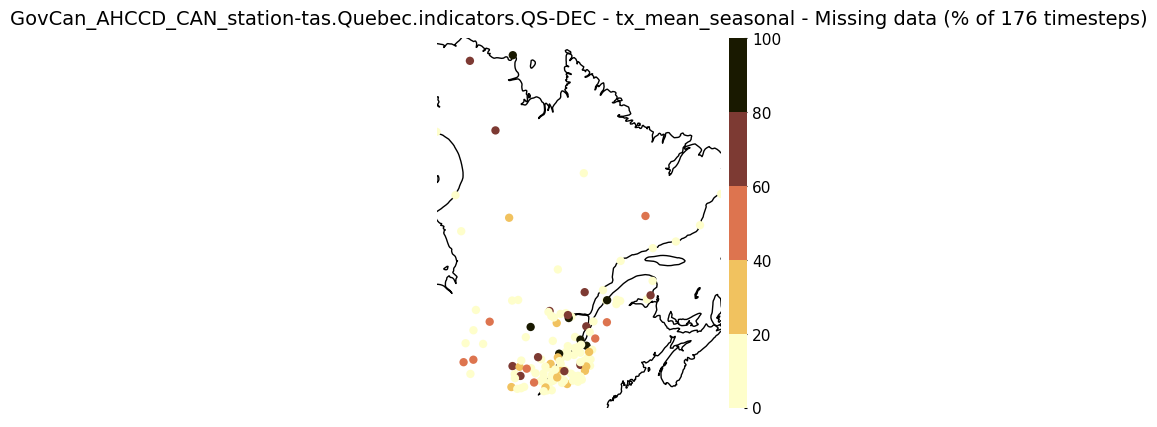

In [5]:
plot_missing_percentage(processing_level='indicators')

In [6]:
plot_missing_percentage(processing_level='climatology')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'
